# Measuring Matter Antimatter Asymmetries at the Large Hadron Collider

This version of the notebook runs in Google Colab, but firts you need to install some packages

In [1]:
pip install uproot awkward awkward-pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.7/375.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.1/886.1 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 29.2 MB/s eta 0:00:00


Download the file [open-data-project-1.1.tar.gz](https://github.com/matchuf/PWF_Gt-Hn-CR_LHCb_open-data), untar the file and save it in your google drive.

On top of that you have to download the real data files: [B2HHH_MagnetUp.root](https://drive.google.com/file/d/10FGQvnZBjzQ4F0d_ZfLzTeoZjKD1IGl0/view?usp=sharing) and [B2HHH_MagnetDown.root](https://drive.google.com/file/d/1meKf8X6jOc176WJOasT21tcITngCRjXh/view?usp=sharing) and save them in the `YOUR_DRIVE_PATH/opendata-project-1.1/Data/` folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/open-data-project-1.1/opendata-project-1.1")

# Check that you are in the correct path
!ls

Mounted at /content/drive
Background-Information-Notebooks  Images
Data				  LHCb_Open_Data_Project_PWF.ipynb
Example-Analysis.ipynb		  LHCb_Open_Data_Project_PWF_without-root.ipynb
Getting_started.ipynb		  LICENSE


# Introduction
### Press the grey arrow to expand each section
____

<b> Welcome to the first guided LHCb Open Data Portal project - Central America Hackathon! </b>


<div align="justify">Here you will be able to analyse data taken by the Large Hadron Collider (LHC) at CERN. The aim of this study is for you to be able to search for differences in the behaviour of matter and antimatter (https://en.wikipedia.org/wiki/Antimatter). This project will enable you to carry out your own data analysis at a level similar to that of CERN research. This project does not require a detailed knowledge of particle physics. It is most suitable for people with a scientific and mathematical background equivalent to that required for applying for university entrance in a science, technology engineering or mathematics discipline. Some previous familiarity with computer programming would also be advantageous. Additional theoretical information or programming knowledge you might need is provided as the project progresses.</div>

Before you start, you might find it helpful to find out more about matter antimatter asymmetries, what we hope to learn by studying them, and how we can detect them with experiments such as the LHCb experiment at CERN.

Here are some details that relate directly to this project:
 - What is the particle physics focus(Background-Information-Notebooks/ProjectIntro.ipynb) of this experiment? and what will I study in this project?
 - How does the LHCb detector (Background-Information-Notebooks/DetectorSoftwareDataSample.ipynb) record the data?

# Getting Started

## Aims:
* Become familiar with the help available for programming
* Read the simulation data into the program
____

<div align="justify">Just like researchers at CERN, you will be coding your own analysis. This will use the computer programming language Python. There is no prerequisite of Python language programming experience for following this project. There will be hints available to you helping you along the way. You might find these tutorials on Python helpful:</div>

[Python Tutorials](http://www.tutorialspoint.com/python/)

The most important coding guidance we are providing you is in the form of an unrelated analysis. We have performed an analysis of Nobel prizes winners (Example-Analysis.ipynb). That link provides you with the full code for this. The coding skills required for this Nobel analysis is very similar to that needed for the particle physics analysis. Hence by reading and understanding that analysis you can copy and adapt the lines of code to perform your particle physics analysis.

## Reading simulation data

In order to get started and check the first code that you will be writing works correctly it is best to start by analysing simulated data rather than real data from the LHC. The real data contains not only the type of events that you wish to analyse, known as the 'signal', but also events that can fake these, known as 'background'. The real data measurements are also limited by the resolution of the detector. The simplified simulation data provided here contains only the signal events and provides the results that would be obtained for a perfect detector.

IMPORTANT: For every code box with code already in it, like the one below you must click in and press shift+enter to run the code.

If the `In [x]:` to the left of a codebox changes to `In [*]:` that means the code in that box is currently running

In [3]:
# Importing  necessary libraries
import numpy as np
import os
import uproot
import pandas
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

If you want help with coding there is in addition to the example code (Example-Analysis.ipynb), some hints within each section and a function reference list (Background-Information-Notebooks/FunctionReferences.pdf).

In [4]:
# Let us now load the simulated data as data frame
with uproot.open("Data/PhaseSpaceSimulation.root:PhaseSpaceTree") as data:
    sim_data = data.arrays(data.keys(),library="pd")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div align="justify">Now that you can access the data, you can use a number of functions which can help you analyse it. You can find these functions in the libraries at the top of the page. Try to make a table of some of the information within your data file so that you can get a feel of the typical values for data in the set. Understanding the range of values for different variables will help with plotting graphs.</div>

The data contains information about 'events' that were observed in the detector. An event refers to the particles produced when an interaction took place when two proton are collided at the LHC. The data you have includes information about particles observed in the detector after each collision. If you think of the data as a table, each row of the table is the results from a different collision. The columns of the table are different quantities measured about the particles produced in the collision.

We are interested in analysing the decays of particles called B<sup>+</sup> or B<sup>-</sup> mesons decaying into three other mesons called kaons (K<sup>+</sup> or K<sup>-</sup>). The events you have been given are those in which this process may have occurred. The detector has been used to reconstruct tracks that may have come from the kaons. You are given the measured momenta, charge, and likelihood of the tracks being kaons. You are given information for three tracks in each event, the ones that could be the three kaons that a B<sup>+</sup> or B<sup>-</sup> meson has decayed into. The following information is available about each event: information list (Background-Information-Notebooks/EventData.ipynb)

In [6]:
# make a table of the data variables here
sim_data.head()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,...,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,0.0,1.0,3551.84,1636.96,23904.14,1.0,0.0,-1,1.0,0,...,1.0,0,36100.40,16546.83,295600.61,1.0,0.0,-1,1.0,0
1,0.0,1.0,-2525.98,-5284.05,35822.00,1.0,0.0,1,1.0,0,...,1.0,0,-8648.32,-16617.56,98535.13,1.0,0.0,-1,1.0,0
2,0.0,1.0,-700.67,1299.73,8127.76,1.0,0.0,-1,1.0,0,...,1.0,0,-13483.34,10860.77,79787.59,1.0,0.0,1,1.0,0
3,0.0,1.0,3364.63,1397.30,222815.29,1.0,0.0,1,1.0,0,...,1.0,0,1925.16,-551.12,40420.96,1.0,0.0,1,1.0,0
4,0.0,1.0,-581.66,-1305.24,22249.59,1.0,0.0,-1,1.0,0,...,1.0,0,-2820.04,-8305.43,250130.00,1.0,0.0,-1,1.0,0


# Invariant mass reconstruction

## Aims:
* Plot a histogram of the momentum of one of the kaon candidates
* Calculate the energy of each of the kaon candidates
* Plot the invariant masses of the B<sup>+</sup> or B<sup>-</sup> mesons___

### Plotting a feature:

You can plot any features of the data in a histogram. Choose any suitable binning that allows you to observed the distribution of the variable clearly. Try making a histogram for the first kaon candidate's momentum x-component (H1_PX):




<ipython-input-7-248fbbe7b732>:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sim_df['H1_PX'],500,[-9000,9000],color="green")   #distribución de la componente x del momento de un candidato a kaón


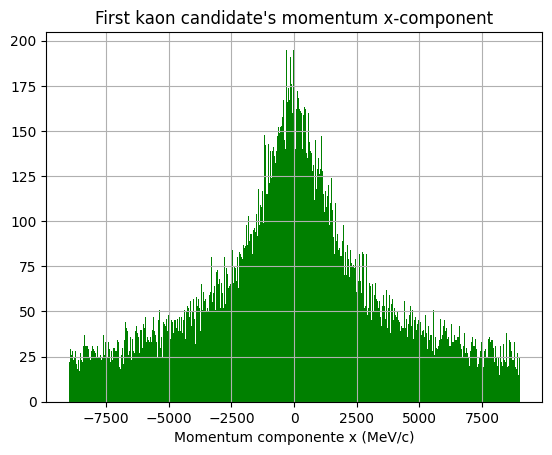

In [7]:
# make a histogram of the H1_PX variable here
sim_df = sim_data.copy()
plt.hist(sim_df['H1_PX'],500,[-9000,9000],color="green")   #distribución de la componente x del momento de un candidato a kaón
plt.xlabel("Momentum componente x (MeV/c)")
plt.title("First kaon candidate's momentum x-component")
plt.grid()
plt.show()

Momentum is a **vector** quantity, it has x,y, and z components. Try calculating the **magnitude** of the momentum of the first kaon candidate and plotting a histogram of this, you'll need the `H1_PX`, `H1_PY` and `H1_PZ` variables.

<ipython-input-8-44fae958d8c1>:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sim_df['H1_P'],100,[0,700000],color="red")


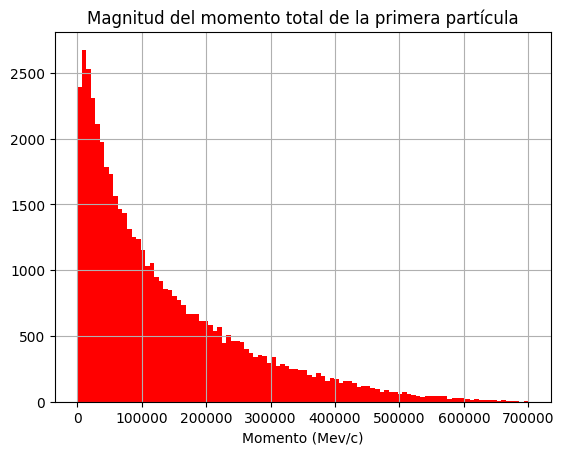

In [8]:
# calculate a variable for the magnitude of the momentum of the first kaon

sim_df['H1_P']=np.sqrt(sim_df['H1_PX']**2+sim_df['H1_PY']**2+sim_df['H1_PZ']**2)
# plot a histogram of this variable

plt.hist(sim_df['H1_P'],100,[0,700000],color="red")
plt.xlabel("Momento (Mev/c)")
plt.title("Magnitud del momento total de la primera partícula")
plt.grid()
plt.show()

### Hints

**Vector Magnitude** The square magnitude of a magnitude of a vector is given by the sum of the square of its of its components in the x,y and z directions: $p^2 = p_x^2+p_y^2+p_z^2$, where $p$ is the magnitude of the momentum, and $p_x,p_y,p_z$ are the components of the momentum in the X,Y, and Z directions.

## Energy and mass

Einstein's theory of special relativity relates Energy, mass and momentum. We have measured the momentum of the kaon candidates in the detector, and have just plotted one of the components of the momentum of the kaon, and the magnitude of the momentum. The invariant mass of the kaon is well known and you can look this up. We wish to determine the energy of the kaons.    

Here is a brief guide to the energy-momentum relation of special relativity (Background-Information-Notebooks/SpecialRelativity.ipynb). Further information can be found on wikipedia pages on [Invariant Mass](https://en.wikipedia.org/wiki/Invariant_mass)  and the [Energy-momentum relation](https://en.wikipedia.org/wiki/Energy%E2%80%93momentum_relation).

Now, calculate the energy of the first kaon candidate using:

<center> $E^2 = p^2 + m^2$ </center>

In [9]:
# calculate the energy of the first kaon
sim_df['H1_E']=np.sqrt(sim_df['H1_P']**2+493.677**2)

<ipython-input-10-41278cf5dd75>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(sim_df['H1_E'],100,[0,700000],color="green")


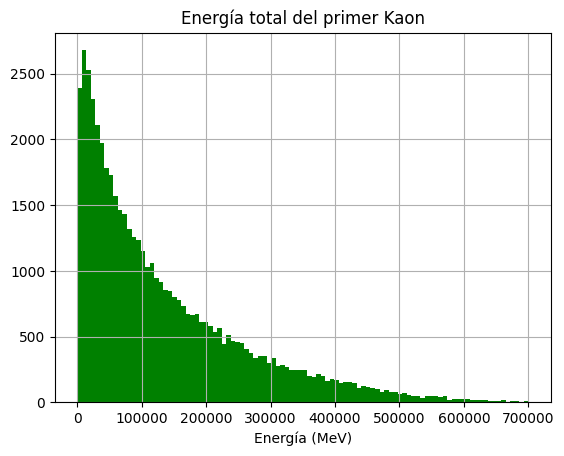

In [10]:
# plot a histogram of this variable
plt.hist(sim_df['H1_E'],100,[0,700000],color="green")
plt.xlabel("Energía (MeV)")
plt.title("Energía total del primer Kaon")
plt.grid()
plt.show()

### Hints

**Energy calculation** - Use the magnitude of momentum variable you calculated above and the known invariant mass of the kaon to work out the energy of the first hadron. Calculate the energy squared, and then the energy and plot this.

**Kaon mass** - you can find the kaon mass on wikipedia or in physics textbooks. There is also a reference used by particle physicists: all our knowledge of the properties of the particles are collected together by the particle data group  [here](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-charged-kaon-mass.pdf).

Calculate the momenta and energies of the second and third kaon candidates also.


In [11]:
# calculate variables for the energy of the other two kaons

sim_df['H2_P']=np.sqrt(sim_df['H2_PX']**2+sim_df['H2_PY']**2+sim_df['H2_PZ']**2)  #mismo proceso para los otros dos candidatos a kaones
sim_df['H3_P']=np.sqrt(sim_df['H3_PX']**2+sim_df['H3_PY']**2+sim_df['H3_PZ']**2)  #momentos

#Energia
sim_df['H2_E']=np.sqrt(sim_df['H2_P']**2+493.677**2)
sim_df['H3_E']=np.sqrt(sim_df['H3_P']**2+493.677**2)


## Adding features of the $B$ meson

In this analysis we are looking for B<sup>+</sup> or B<sup>-</sup> mesons (see [B meson](https://en.wikipedia.org/wiki/B_meson)) that have decayed into the three charged [kaons](https://en.wikipedia.org/wiki/Kaon).

Energy is a conserved quantities. This means that you can use the energy of the three 'daughter' kaons, which you have calculated above, to calculate the energy that the B meson that decayed into them must have.

Momentum is also a conserved quantity. Hence you can also use the momenta of the 'daughter' kaons to calculate the momentum of the B meson. But be careful - momentum is a *vector* quantity.

Using the Energy of the B meson and the magnitude of the momentum of the B meson you can use the energy-momentum relationship again. This time you are applying it to the B meson. This will allow you to calculate the invariant mass of the B meson.


In [12]:
# calculate the energy of the B meson
sim_df['B_E']=sim_df['H1_E']+sim_df['H2_E']+sim_df['H3_E']

In [13]:
# calculate the momentum components of the B meson
sim_df['B_PX']=sim_df['H1_PX']+sim_df['H2_PX']+sim_df['H3_PX']       #es necesario calcular cada componente
sim_df['B_PY']=sim_df['H1_PY']+sim_df['H2_PY']+sim_df['H3_PY']       #el momento es un vector
sim_df['B_PZ']=sim_df['H1_PZ']+sim_df['H2_PZ']+sim_df['H3_PZ']
# and the magnitude of the momentum of the B meson
sim_df['B_P']=np.sqrt(sim_df['B_PX']**2+sim_df['B_PY']**2+sim_df['B_PZ']**2)

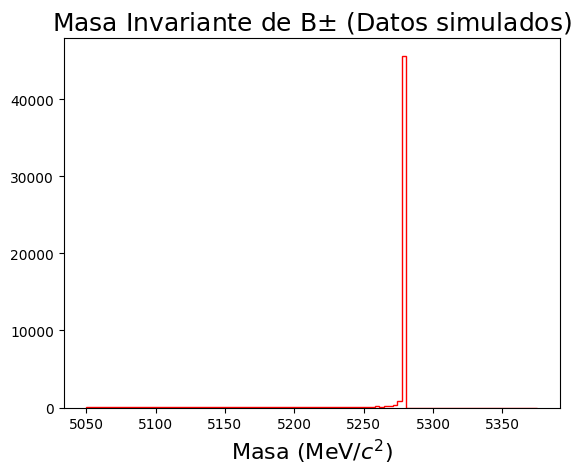

In [14]:
# calculate the B meson invariant mass
sim_df['B_M']=np.sqrt(sim_df['B_E']**2-sim_df['B_P']**2)
# plot the B meson invariant mass in a histogram

plt.hist(sim_df['B_M'], bins=100,range=(5050,5375), color = "red", histtype='step')
plt.xlabel(r"Masa (MeV/$c^2$)", fontsize = 16)
plt.title(r"Masa Invariante de B$\pm$ (Datos simulados)",fontsize=18)
plt.show()

You should have a graph that sharply peaks at the mass of the B<sup>+</sup> meson. The mass of the B<sup>+</sup> and B<sup>-</sup> meson are the same. Check that the peak of your graph is at the [known mass](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) of the B meson. **Congratulations!**

Recall that you have made this plot for simulated data. How might you expect the plots for real data to look different ? In the next section you will start to work with the real LHC data.

### Hint

**B Meson Energy** - From energy conservation, the energy of the B meson will be the sum of the energies of the three kaons: $E_B=E_{K1}+E_{K2}+E_{K3}$, where $E_B$ is the energy of the B meson, $E_{K1}, E_{K2}, E_{K3}$ are the energies of each of the kaons.

**B meson momentum** - From momentum conservation, the X component of the momentum of the B meson will be the sum of the X momentum components of the three Kaons : $px_B=px_{K1}+px_{K2}+px_{K3}$, where $px$ is the X direction component of the momentum of the B meson, $px_{K1},px_{K2},px_{K3}$ are the X direction components of the momenta of the three kaons. You can then do the same with the Y and Z components. Having obtained the X,Y, and z components of the B momentum you can find the magnitude of the momentum of the B meson.

**B meson invariant mass** - Rearrange the equation $E^2=p^2+m^2$ to find $m^2$. Using the values of the magnitude of the momentum of the B meson and the B meson Energy, find the mass of the B meson.

**Histogram plotting** - Take care that the range of your mass plot is set suitably that you can see the mass peak. Once you have found the peak you can set the range appropriately. You do not have to start your graph at a mass of 0.

**Units** - The data you are provided has energies in 'MeV' (10<sup>6</sup> electron volts). The mass of the B meson is often quoted in 'GeV/c<sup>2</sup>' (10<sup>9</sup> electron volts).

# Working with real data and applying cuts
## Aims - Challenges 1 and 2:
* Filter out data that is not from the B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> channel, or the antiparticle equivalent B<sup>-</sup> → K<sup>+</sup>K<sup>-</sup>K<sup>−</sup>

* Plot a histogram of B-meson mass for the real data and observe how different cuts affect the data

In the section above you have analysed the simulation data to determine the invariant mass of the B meson. Now, you can start applying the methods you have used to the real LHCb data. This data was collected by the LHCb detector at CERN during 2011, the first major year of LHC operations.

The data you are given has been filtered to select only events that are likely to have come from B<sup>+</sup> or B<sup>-</sup> mesons decaying into three final state charged particles. You are interested in the case where these three final state paticles are charged kaons K<sup>+</sup> or K<sup>-</sup>.

An introduction has been provided on the detector and data sample (Background-Information-Notebooks/DetectorSoftwareDataSample.ipynb). As background information we also provide further information on the
 selection (Background-Information-Notebooks/DataSelection.ipynb) that has been applied to select this data sample.

## Preselection
You want to apply a preselection to the three final state tracks that
* Ensures that they are not muons [i.e. `(H1_isMuon==0)`, and similarly for `H2` and `H3`]
* Requires that they each have a low probability of being pions [e.g. `(H1_ProbPi) is a Particle Identification Variable - H1 probability of being a pion`]
* Requires that they each have a high probability of being a kaon [e.g. `(H1_ProbK) is a Particle Identification Variable -H1 probability of being a kaon`]

You need to find a balance between making cuts that are too loose and include too many background events and too tight and reject many of your signal events.

In order to now find the most suitable further selection cuts, make yourself familiar with how cuts can affect the significance of the final result (Background-Information-Notebooks/CutsInformation.ipynb). Feel free to come back to this stage later and adjust your cuts to see the impact.

The pre selection you create will be applied for you if give it the name 'preselection'.

We have provided an example preselection in the hints, so feel free to use that to get started if you wish. start with a loose preselection and then refine it after you have studied the plots.



In [15]:
# Make your preselection here, this line applies no preselection
preselection =("(H1_isMuon==0) & (H2_isMuon==0) & (H3_isMuon==0) & (H1_ProbK-1.5*H1_ProbPi>0) & (H2_ProbK-1.5*H2_ProbPi>0) & (H3_ProbK-1.5*H3_ProbPi>0)& "
    "(B_VertexChi2<10) & (H1_IPChi2>10) & (H2_IPChi2>10) & (H3_IPChi2>10) ")

This next line of code just loads the real data into a new DataFrame, this may take a few minutes.
It also applies the preselection that you have created if you called it preselection.

In [16]:
#Calculamos la cantidad de eventos antes de aplicar la preselección

# Lee el archivo sin aplicar la preselección
with uproot.open("Data/B2HHH_MagnetUp.root:DecayTree") as data:
    before_real_data = data.arrays(data.keys(),library="pd")

with uproot.open("Data/B2HHH_MagnetDown.root:DecayTree") as data:
    before_real_data._append(data.arrays(data.keys(),library="pd"), ignore_index=True)

# Suma los eventos de ambos archivos
print("Número total de eventos antes de la preselección:", len(before_real_data))

Número total de eventos antes de la preselección: 3420295


In [17]:
with uproot.open("Data/B2HHH_MagnetUp.root:DecayTree") as data:
    real_data = data.arrays(data.keys(),preselection,library="pd")

with uproot.open("Data/B2HHH_MagnetDown.root:DecayTree") as data:
    real_data._append(data.arrays(data.keys(),preselection,library="pd"), ignore_index=True)

print("Número total de eventos después de la preselección:", len(real_data))

Número total de eventos después de la preselección: 12273


Make histograms of the probability of a final state particle being a kaon or a pion.
These will help guide you on suitable probability values at which to cut.

You can also consider more sophisticated options like 2-D plots of kaon and pion probabilities or different values of the cuts for the different final state particles.

In [18]:
real_data.head()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,...,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
325,10.428140,4.056947,-4168.055539,-704.953919,24548.766576,0.771199,0.051726,-1,1002.657075,0,...,714.174519,0,-8864.962492,-7428.640292,77446.175923,0.934580,0.128720,1,536.585115,0
495,5.796507,4.632833,1146.863275,62.865955,17993.678629,0.353851,0.104533,1,775.135404,0,...,253.494081,0,-2510.373706,-125.031711,22699.566908,0.958085,0.094597,-1,197.157935,0
517,14.308634,1.517676,4148.543227,1120.800651,32570.667856,0.942564,0.096867,1,1822.312429,0,...,2165.930625,0,3513.343363,803.938272,62451.266172,0.923655,0.130080,-1,1815.160743,0
539,33.591307,2.220242,1295.910334,-61.956920,35569.606902,0.932006,0.058690,-1,6672.092707,0,...,737.219732,0,-341.750434,3317.423370,24380.200353,0.968883,0.129317,1,23332.453390,0
1203,3.129789,5.072809,1421.948854,-666.134777,14676.910600,0.288271,0.045293,1,471.351129,0,...,45.250334,0,-2189.941266,950.500098,23930.313780,0.782511,0.069866,-1,505.737916,0


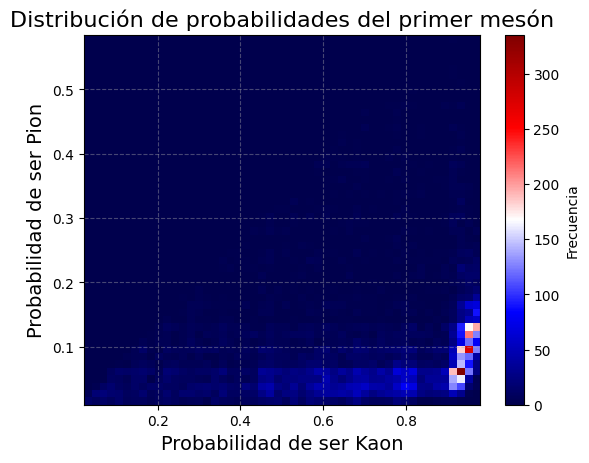

In [19]:
# plot the probability that a final state particle is a kaon and a pion in histogram 2D
plt.hist2d(real_data['H1_ProbK'], real_data['H1_ProbPi'], bins=50, cmap='seismic')
plt.colorbar(label='Frecuencia')

#Nombre de los ejes
plt.xlabel('Probabilidad de ser Kaon', fontsize=14)
plt.ylabel('Probabilidad de ser Pion', fontsize=14)
plt.title('Distribución de probabilidades del primer mesón', fontsize=16)

# Agregar una cuadrícula
plt.grid(True, linestyle='--', alpha=0.4)

# Mostrar el gráfico
plt.show()

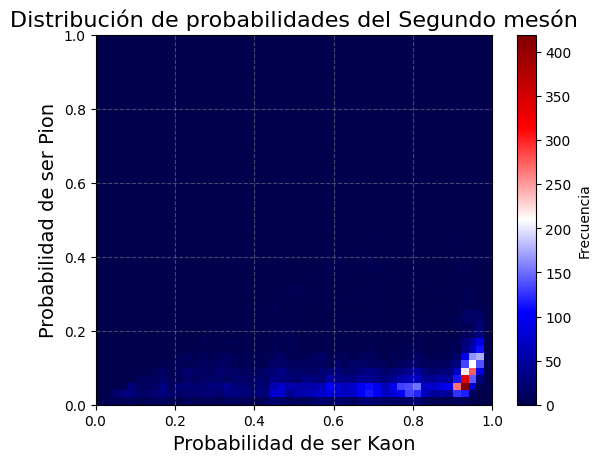

In [20]:
#plot the probability that a final state particle is a kaon and a pion in histogram 2D (SEGUNDO MESÓN)
plt.hist2d(real_data['H2_ProbK'], real_data['H2_ProbPi'], bins=50, range=[[0, 1], [0, 1]], cmap='seismic')
plt.colorbar(label='Frecuencia')

#Nombre de los ejes
plt.xlabel('Probabilidad de ser Kaon', fontsize=14)
plt.ylabel('Probabilidad de ser Pion', fontsize=14)
plt.title('Distribución de probabilidades del Segundo mesón', fontsize=16)

# Agregar una cuadrícula
plt.grid(True, linestyle='--', alpha=0.4)

# Mostrar el gráfico
plt.show()

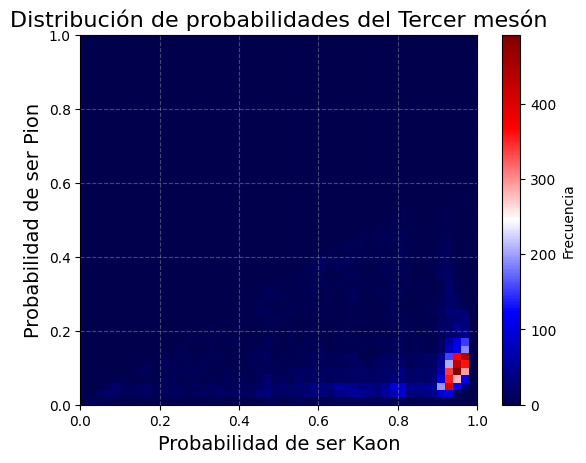

In [21]:
#plot the probability that a final state particle is a kaon and a pion in histogram 2D (TERCER MESÓN)
plt.hist2d(real_data['H3_ProbK'], real_data['H3_ProbPi'], bins=50, range=[[0, 1], [0, 1]], cmap='seismic')
plt.colorbar(label='Frecuencia')

#Nombre de los ejes
plt.xlabel('Probabilidad de ser Kaon', fontsize=14)
plt.ylabel('Probabilidad de ser Pion', fontsize=14)
plt.title('Distribución de probabilidades del Tercer mesón', fontsize=16)

# Agregar una cuadrícula
plt.grid(True, linestyle='--', alpha=0.4)

# Mostrar el gráfico
plt.show()



Now calculate the invariant mass of the B meson for the real data and plot a histogram of this.
Compare it with the one you drew for the simulation data.

Can you explain the differences you observe?

In [22]:
#Se define una función que calcule la energía, momentum total y masa invariante
def calcular_energia_momentum(df, px_col, py_col, pz_col, masa_particula, sufijo):
    # Calcular el momentum total
    df[f'{sufijo}_P'] = np.sqrt(df[px_col]**2 + df[py_col]**2 + df[pz_col]**2)

    # Calcular la energía total
    df[f'{sufijo}_E'] = np.sqrt(df[f'{sufijo}_P']**2 + masa_particula**2)

    # Calcular la masa invariante
    df[f'{sufijo}_M'] = np.sqrt(df[f'{sufijo}_E']**2 - df[f'{sufijo}_P']**2)

    return df

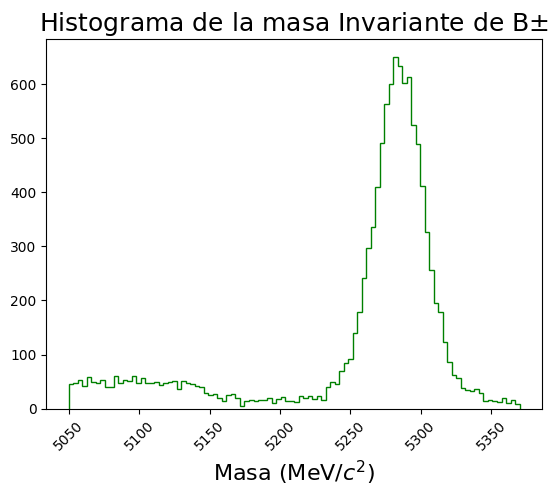

In [23]:
# draw a histogram for the B meson mass in the real data
real_df=real_data.copy()

#Calculo de la energía, momentum y masa invariante de las tres partículas
real_df = calcular_energia_momentum(real_df, 'H1_PX', 'H1_PY', 'H1_PZ', 493.677, 'H1')
real_df = calcular_energia_momentum(real_df, 'H2_PX', 'H2_PY', 'H2_PZ', 493.677, 'H2')
real_df = calcular_energia_momentum(real_df, 'H3_PX', 'H3_PY', 'H3_PZ', 493.677, 'H3')

#Energia y las tres componentes del momentum para B
real_df['B_E']=real_df['H1_E']+real_df['H2_E']+real_df['H3_E']
real_df['B_PX']=real_df['H1_PX']+real_df['H2_PX']+real_df['H3_PX']       #es necesario calcular cada componente
real_df['B_PY']=real_df['H1_PY']+real_df['H2_PY']+real_df['H3_PY']       #el momento es un vector
real_df['B_PZ']=real_df['H1_PZ']+real_df['H2_PZ']+real_df['H3_PZ']

#Calculo de la magnitud del momentum
real_df['B_P']=np.sqrt(real_df['B_PX']**2+real_df['B_PY']**2+real_df['B_PZ']**2)

#Calculo de la masa invariante de B
real_df['B_M']=np.sqrt(real_df['B_E']**2-real_df['B_P']**2)

# plot the B meson invariant mass in a histogram
plt.hist(real_df['B_M'],bins=100,range=(5050,5370),color ="green", histtype='step')
plt.xlabel(r"Masa (MeV/$c^2$)", fontsize = 16)
plt.title(r"Histograma de la masa Invariante de B$\pm$",fontsize=18)
# Modificar las marcas de graduación del eje x
plt.xticks(rotation=45)  # Ajusta el rango y la rotación
plt.show()


Experiment with the cuts and see the impact of harsher or more lenient cuts on the invariant mass plot.
You should select a set of cuts which makes the signal most prominent with respect to the background.
Once you have finalised the selection on particle identification also make cuts on the reconstructed particle mass to select the events in the B meson mass peak, removing the background events which lie at lower and higher invariant masses.

# Searching for global matter anti-matter differences

In this section you will start to study matter antimatter differences (CP Violation). Here 'global' means that you are looking for differences across all ranges of energy and momentum (the kinematics) of the kaons into which the charge B mesons have decayed. Later we look at 'local' differences in different regions of the kinematics.

## Aims:
* Calculate the global CP asymmetry
* Work out the statistical uncertainty
* Determine if there is evidence for CP violation in this decay

In order to quantify the matter antimatter asymmetry in this process we wish to compare the B<sup>+</sup> and the B<sup>-</sup> particles. The B<sup>-</sup> is the anti-particle of the B<sup>+</sup>.

How can you distinguish between events that contain B<sup>+</sup> and B<sup>-</sup> particles using `H1_Charge`, `H2_Charge` and `H3_Charge`?

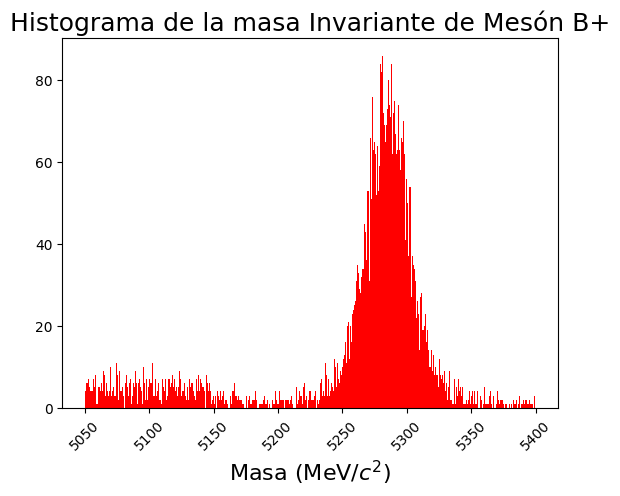

In [24]:
# make a variable for the charge of the B mesons
real_B=real_data[(real_data['H1_Charge'] + real_data['H2_Charge'] + real_data['H3_Charge'] == 1)].copy()

#Calulo de la energía, momentum, y masa invariante de las tres partículas
real_B = calcular_energia_momentum(real_B, 'H1_PX', 'H1_PY', 'H1_PZ', 493.677, 'H1')
real_B = calcular_energia_momentum(real_B, 'H2_PX', 'H2_PY', 'H2_PZ', 493.677, 'H2')
real_B = calcular_energia_momentum(real_B, 'H3_PX', 'H3_PY', 'H3_PZ', 493.677, 'H3')

#Calculo de la energía y componentes del momentum de la partícula B
real_B['B_E']=real_B['H1_E']+real_B['H2_E']+real_B['H3_E']
real_B['B_PX']=real_B['H1_PX']+real_B['H2_PX']+real_B['H3_PX']       #es necesario calcular cada componente
real_B['B_PY']=real_B['H1_PY']+real_B['H2_PY']+real_B['H3_PY']       #el momento es un vector
real_B['B_PZ']=real_B['H1_PZ']+real_B['H2_PZ']+real_B['H3_PZ']

# and the magnitude of the momentum of the B+ meson
real_B['B_P']=np.sqrt(real_B['B_PX']**2+real_B['B_PY']**2+real_B['B_PZ']**2)

#Calculo de la masa invariante de B+
real_B['B_M']=np.sqrt(real_B['B_E']**2-real_B['B_P']**2)

# plot the B+ meson invariant mass in a histogram
plt.hist(real_B['B_M'],bins=500,range=(5050,5400),color ="red")
plt.xlabel(r"Masa (MeV/$c^2$)", fontsize = 16)
plt.xticks(rotation=45)
plt.title("Histograma de la masa Invariante de Mesón B+",fontsize=18)
plt.show()

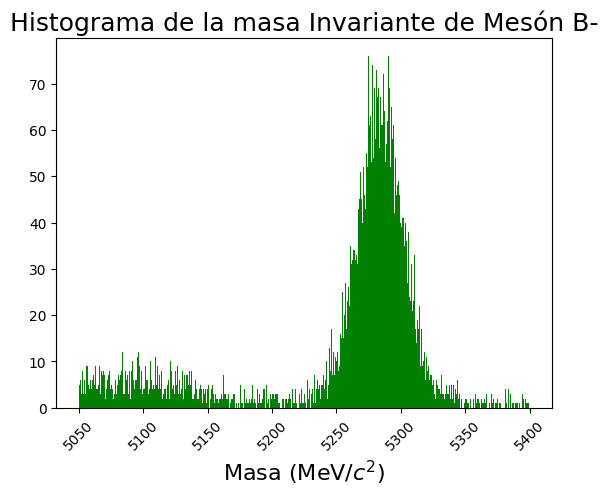

In [25]:
# make a variable for the charge of the B mesons
real_nB=real_data[(real_data['H1_Charge'] + real_data['H2_Charge'] + real_data['H3_Charge'] == -1)].copy()

#Calulo de la energía, momentum, y masa invariante de las tres partículas
real_nB = calcular_energia_momentum(real_nB, 'H1_PX', 'H1_PY', 'H1_PZ', 493.677, 'H1')
real_nB = calcular_energia_momentum(real_nB, 'H2_PX', 'H2_PY', 'H2_PZ', 493.677, 'H2')
real_nB = calcular_energia_momentum(real_nB, 'H3_PX', 'H3_PY', 'H3_PZ', 493.677, 'H3')

#Calculo de la energía y componentes del momentum de la partícula B-
real_nB['B_E']=real_nB['H1_E']+real_nB['H2_E']+real_nB['H3_E']
real_nB['B_PX']=real_nB['H1_PX']+real_nB['H2_PX']+real_nB['H3_PX']       #es necesario calcular cada componente
real_nB['B_PY']=real_nB['H1_PY']+real_nB['H2_PY']+real_nB['H3_PY']       #el momento es un vector
real_nB['B_PZ']=real_nB['H1_PZ']+real_nB['H2_PZ']+real_nB['H3_PZ']

# and the magnitude of the momentum of the B- meson
real_nB['B_P']=np.sqrt(real_nB['B_PX']**2+real_nB['B_PY']**2+real_nB['B_PZ']**2)
real_nB['B_M']=np.sqrt(real_nB['B_E']**2-real_nB['B_P']**2)

# plot the B meson invariant mass in a histogram
plt.hist(real_nB['B_M'],bins=500,range=(5050,5400), color = "green")
plt.xlabel(r"Masa (MeV/$c^2$)", fontsize = 16)
plt.xticks(rotation=45)
plt.title("Histograma de la masa Invariante de Mesón B-",fontsize=18)
plt.show()


Now count the numbers of events of each of the two types (N<sup>+</sup> and N<sup>-</sup>). Also calculate the difference between these two numbers.

In [26]:
# make variables for the numbers of positive and negative B mesons
B_values = real_B.shape[0]
print(f"No. de eventos de B+: {B_values}")
nB_values = real_nB.shape[0]
print(f"No. de eventos de B-: {nB_values}")

No. de eventos de B+: 6361
No. de eventos de B-: 5912


In order to calculate the Asymmetry, you can make use of the formula:
(note you may need to run this box in order to see the image)
<img src="https://drive.google.com/uc?id=1hl0Kt7Eg3hKP-bOL-O-qVJ9dncBDEAq-" width="200" />

In [27]:
# calculate the value of the asymmetry, by using the formula above, and then print it
asymmetry=(nB_values-B_values)/(B_values+nB_values)
print(f"{asymmetry:.5f} es el valor de la asimetría")

-0.03658 es el valor de la asimetría


### Hint

**Differentiating between N+ and N-**

 - Charge is a conserved quantity. The charge of the $B$ meson is equal to the sum of the charges of the particles into which it decays.

### Estimating the significance of the deviation

You will now need to calculate the statistical uncertainty of the asymmetry. You can do so using the formula: <img src="https://drive.google.com/uc?id=10Vv8Iicu99hsquv17yJC0nmt1PUPBS-S" width="200" />

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery".

In [28]:
# calculate the statistical significance of your result and print it
significance=np.sqrt((1-asymmetry**2)/(B_values+nB_values))
print(f"La incerteza estadística es: {significance:.5f}")

#Calculo del sigma
sigma=asymmetry/significance
print(f"La significancia es de: {sigma:.2f} sigma")

La incerteza estadística es: 0.00902
La significancia es de: -4.06 sigma


**Congratulations!** You have performed your first search for a matter anti-matter difference.

Here you have only considered the statistical uncertainty. Your measurement will also have other sources of uncertainty known as systematic uncertainties which you have not considered at this stage.


# Dalitz plots and two body resonances
## Aims:
* Produce Dalitz plots of the simulation and real data sample
* Create ordered and binned dalitz plots.
* Identify two body resonances in the Dalitz plots

In this stage we introduce you to an important technique for analysing decays of one particle (your charged B meson) into three bodies (the three kaons). This is known as a Dalitz plot.

The decay of the B meson can proceed either directly to the three-body final state or via an intermediate particle. For example, B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup>, could proceed through the decay  B<sup>+</sup> → K<sup>+</sup>R<sup>0</sup>, where R<sup>0</sup> is a neutral particle resonance which can decay R<sup>0</sup> → K<sup>+</sup>K<sup>-</sup>. Dalitz plots can be used to identify these resonances which are visible as bands on the Dalitz plot.

More information about these plots and why these are used in particle physics research can be found in Dalitz Plot Introduction (Background-Information-Notebooks/DalitzPlots.ipynb).

The kinematics of a three-body decay can be fully described using only two variables. The energies and momenta of the three kaons are not independent of each other as they all come from the decay of a B meson and energy and momentum are conserved. The axes of the plots conventionally are the squared invariant masses of two pairs of the decay products. It is a 2D plot, the x and y axes are both squared masses and the density of points in the plot shows the structure.

Consider our decay B<sup>+</sup> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>K<sup>−</sup><sub>3</sub>, where we have numbered the kaons 1,2,3 to distinguish them. We can calculate the invariant mass of three possible combinations that could correspond to intermediate resonances R<sup>++</sup><sub>1</sub> → K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>, R<sup>0</sup><sub>2</sub> → K<sup>+</sup><sub>1</sub>K<sup>-</sup><sub>3</sub>, and R<sup>0</sup><sub>3</sub> → K<sup>+</sup><sub>2</sub>K<sup>-</sup><sub>3</sub>.

The potential R<sup>++</sup><sub>1</sub> would be a doubly charged resonance. We would not expect to see any resonances corresponding to this as mesons are composed of one quark and one anti-quark and their charges cannot add up to two units.

The potential R<sup>0</sup><sub>2</sub> and R<sup>0</sup><sub>3</sub> correspond to configurations in which we could see resonances. Hence you should compute the invariant mass combinations for these. The square of these masses should be used as the Dalitz variables.

We suggest you make these plots first for the simulation data. In the simulation there are no intermediate resonances and your plot should be of uniform density inside the range physically allowed by energy and momentum conservation.


In [29]:
#Función que organiza a las partículas por sus propiedades
def reorganizar_particulas(row):
    particulas = [
        {'charge': row['H1_Charge'], 'E': row['H1_E'], 'Px': row['H1_PX'], 'Py': row['H1_PY'], 'Pz': row['H1_PZ']},
        {'charge': row['H2_Charge'], 'E': row['H2_E'], 'Px': row['H2_PX'], 'Py': row['H2_PY'], 'Pz': row['H2_PZ']},
        {'charge': row['H3_Charge'], 'E': row['H3_E'], 'Px': row['H3_PX'], 'Py': row['H3_PY'], 'Pz': row['H3_PZ']}
    ]

    # Ordenar las partículas por su carga (primero positivos, luego negativos)
    particulas.sort(key=lambda x: x['charge'], reverse=True)

    # Actualizar el DataFrame con el nuevo orden
    for i, p in enumerate(particulas, start=1):
        row[f'H{i}_Charge'] = p['charge']
        row[f'H{i}_E'] = p['E']
        row[f'H{i}_PX'] = p['Px']
        row[f'H{i}_PY'] = p['Py']
        row[f'H{i}_PZ'] = p['Pz']

    return row

In [30]:
# calculate the invariant masses for each possible hadron pair combination

#Copia del data frame para B+
sim_df_B = sim_df[(sim_df['H1_Charge'] + sim_df['H2_Charge'] + sim_df['H3_Charge'] == 1)].copy()
#Se toman las columnas solo de interés
columnas_interes = ['H1_Charge','H1_E','H1_PX','H1_PY','H1_PZ','H2_Charge','H2_E','H2_PX','H2_PY','H2_PZ','H3_Charge','H3_E','H3_PX','H3_PY','H3_PZ']
new_df_B=sim_df[columnas_interes]

# Se reorganizar las partículas a través de la función
new_df_B = new_df_B.apply(reorganizar_particulas, axis=1)

#Calculo de la masa^2 invariante para R02 → K+1K-3
new_df_B['R+-'] = (
    (new_df_B['H1_E'] + new_df_B['H3_E'])**2 -
    ((new_df_B['H1_PX'] + new_df_B['H3_PX'])**2 +
     (new_df_B['H1_PY'] + new_df_B['H3_PY'])**2 +
     (new_df_B['H1_PZ'] + new_df_B['H3_PZ'])**2)
)

#Calculo de la masa^2 invariante para R03 → K+2K-3
new_df_B['R-+'] = (
    (new_df_B['H2_E'] + new_df_B['H3_E'])**2 -
    ((new_df_B['H2_PX'] + new_df_B['H3_PX'])**2 +
     (new_df_B['H2_PY'] + new_df_B['H3_PY'])**2 +
     (new_df_B['H2_PZ'] + new_df_B['H3_PZ'])**2)
)

#Calculo de la masa^2 invariante para R++1 → K+1K+2
new_df_B['R++'] = (
    (new_df_B['H2_E'] + new_df_B['H1_E'])**2 -
    ((new_df_B['H2_PX'] + new_df_B['H1_PX'])**2 +
     (new_df_B['H2_PY'] + new_df_B['H1_PY'])**2 +
     (new_df_B['H2_PZ'] + new_df_B['H1_PZ'])**2)
)

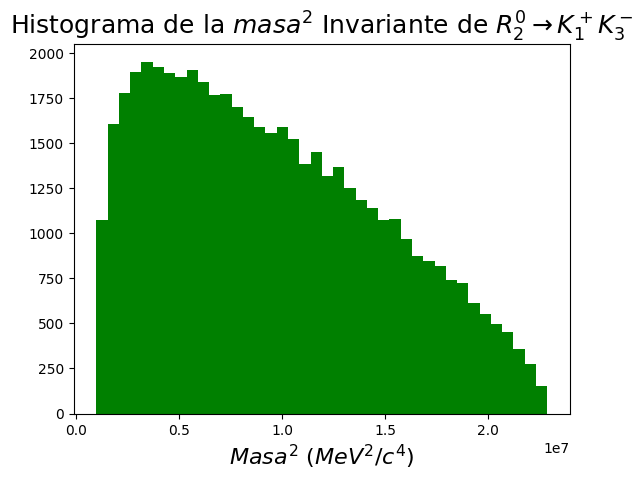

In [31]:
# plot the invariant mass for one of these combinations
plt.hist(new_df_B['R+-'], bins=40, color = "green")
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.title(r"Histograma de la $masa^2$ Invariante de $R^0_2 \to K^+_1K^-_3$",fontsize=18)
plt.show()

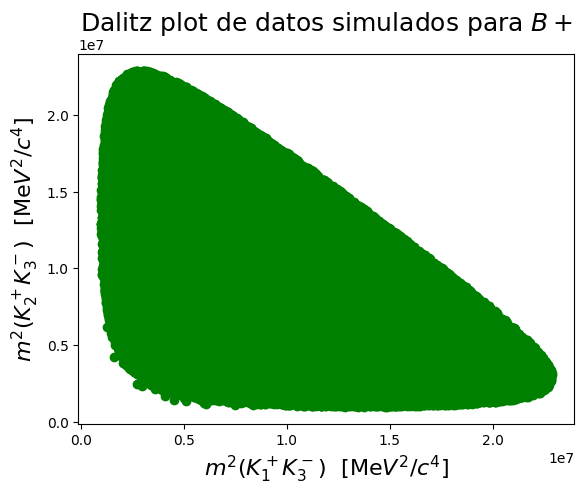

In [32]:
# make a Dalitz plot with labelled axes for the simulation data
plt.scatter(new_df_B['R+-'], new_df_B['R-+'], color = "green")
plt.xlabel(r"$m^2(K^+_1K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+_2K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de datos simulados para $B+$",fontsize=18)
plt.show()


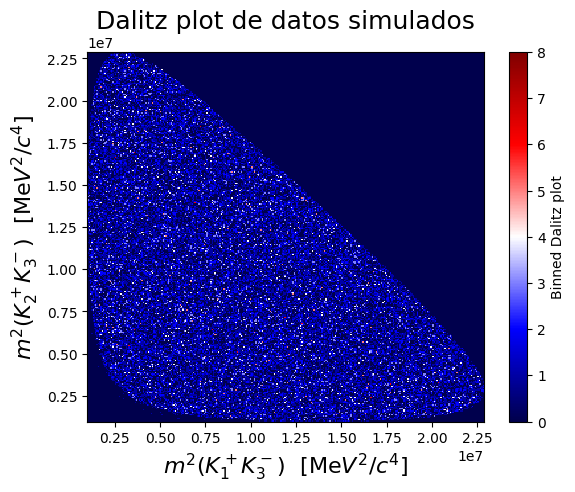

In [33]:
#Dalitz plot en un histograma en 2D
plt.hist2d(new_df_B['R+-'], new_df_B['R-+'], bins=300, cmap='seismic')
plt.colorbar(label='Binned Dalitz plot')
plt.xlabel(r"$m^2(K^+_1K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+_2K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de datos simulados",fontsize=18)
plt.show()

### Hints

**Calculating invariant mass** - Use the same technique as you did above for the B meson, but now applying it to two-body invariant masses rather than three.

**Plotting the Dalitz plot** - You can use a `scatter` plot from `matplotlib` to plot a Dalitz plotm, see the example analysis (Example-Analysis.ipynb). Remember to use the square of each two-body mass.

## Adding Dalitz plot for real data
Now draw a Dalitz plot for the real data. Check that the signs of the charge of the hadrons are correct to correspond to your potential neutral resonances R<sup>0</sup><sub>2</sub> and R<sup>0</sup><sub>3</sub>.

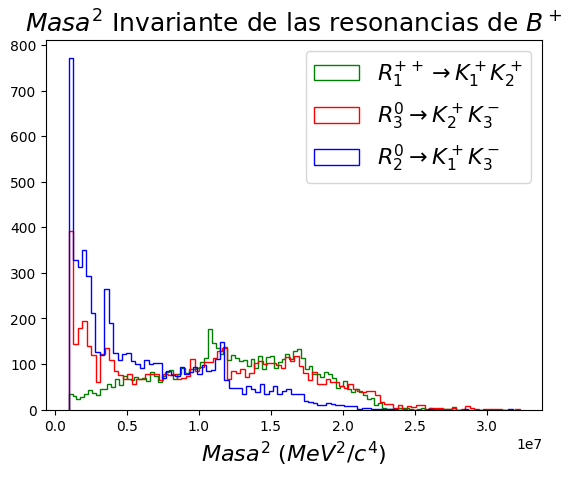

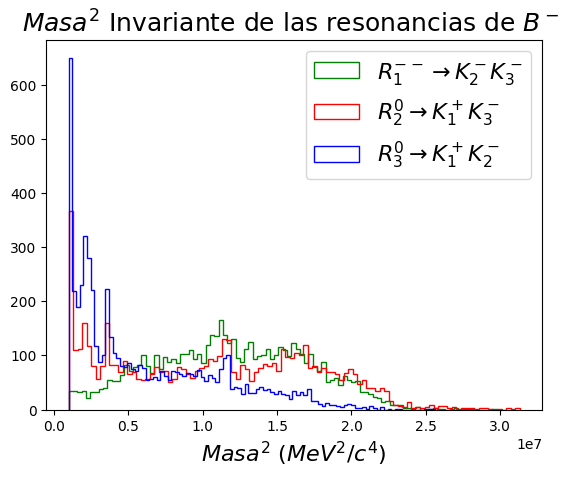

In [34]:
# calculate the invariant masses for each possible hadron pair combination in the real data

#Se reorganizan las partículas através de la función para B+
real_B = real_B.apply(reorganizar_particulas, axis=1)

#Calculo de la masa^2 invariante para R02 → K+1K-3
real_B['R+-'] = (
    (real_B['H1_E'] + real_B['H3_E'])**2 -
    ((real_B['H1_PX'] + real_B['H3_PX'])**2 +
     (real_B['H1_PY'] + real_B['H3_PY'])**2 +
     (real_B['H1_PZ'] + real_B['H3_PZ'])**2)
    )

#Calculo de la masa^2 invariante para R03 → K+2K-3
real_B['R-+'] = (
    (real_B['H2_E'] + real_B['H3_E'])**2 -
    ((real_B['H2_PX'] + real_B['H3_PX'])**2 +
     (real_B['H2_PY'] + real_B['H3_PY'])**2 +
     (real_B['H2_PZ'] + real_B['H3_PZ'])**2)
    )

#Calculo de la masa^2 invariante para R++1 → K+1K+2
real_B['R++'] = (
    (real_B['H1_E'] + real_B['H2_E'])**2 -
    ((real_B['H1_PX'] + real_B['H2_PX'])**2 +
     (real_B['H1_PY'] + real_B['H2_PY'])**2 +
     (real_B['H1_PZ'] + real_B['H2_PZ'])**2)
)

#Reorganización de las partículas através de la función
real_nB = real_nB.apply(reorganizar_particulas, axis=1)

#Calculo de la masa^2 invariante para R03 → K+1K-2
real_nB['nR+-'] = (
    (real_nB['H1_E'] + real_nB['H2_E'])**2 -
    ((real_nB['H1_PX'] + real_nB['H2_PX'])**2 +
     (real_nB['H1_PY'] + real_nB['H2_PY'])**2 +
     (real_nB['H1_PZ'] + real_nB['H2_PZ'])**2)
)

#Calculo de la masa^2 invariante para R02 → K+1K-3
real_nB['nR-+'] = (
    (real_nB['H1_E'] + real_nB['H3_E'])**2 -
    ((real_nB['H1_PX'] + real_nB['H3_PX'])**2 +
     (real_nB['H1_PY'] + real_nB['H3_PY'])**2 +
     (real_nB['H1_PZ'] + real_nB['H3_PZ'])**2)
)

#Calculo de la masa^2 invariante para R--1 → K-2K-3
real_nB['nR--'] = (
    (real_nB['H3_E'] + real_nB['H2_E'])**2 -
    ((real_nB['H3_PX'] + real_nB['H2_PX'])**2 +
     (real_nB['H3_PY'] + real_nB['H2_PY'])**2 +
     (real_nB['H3_PZ'] + real_nB['H2_PZ'])**2)
)

#Realizamos un histograma para la masa invariante

#Para B+
plt.hist(real_B['R++'], bins=100, color ="green", histtype='step', label = r"$R^{++}_1 \to K^+_1K^+_2$")
plt.hist(real_B['R-+'], bins=100, color ="red", histtype='step', label = r"$R^{0}_3 \to K^+_2K^-_3$")
plt.hist(real_B['R+-'], bins=100, color ="blue", histtype='step', label = r"$R^{0}_2 \to K^+_1K^-_3$")
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.title(r"$Masa^2$ Invariante de las resonancias de $B^+$",fontsize=18)
plt.legend(fontsize = 16)
plt.show()

#Para B-
plt.hist(real_nB['nR--'], bins=100, color ="green", histtype='step', label = r"$R^{--}_1 \to K^-_2K^-_3$")
plt.hist(real_nB['nR-+'], bins=100, color ="red", histtype='step', label = r"$R^{0}_2 \to K^+_1K^-_3$")
plt.hist(real_nB['nR+-'], bins=100, color ="blue", histtype='step', label = r"$R^{0}_3 \to K^+_1K^-_2$")
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.title(r"$Masa^2$ Invariante de las resonancias de $B^-$ ",fontsize=18)
plt.legend(fontsize = 16)
plt.show()

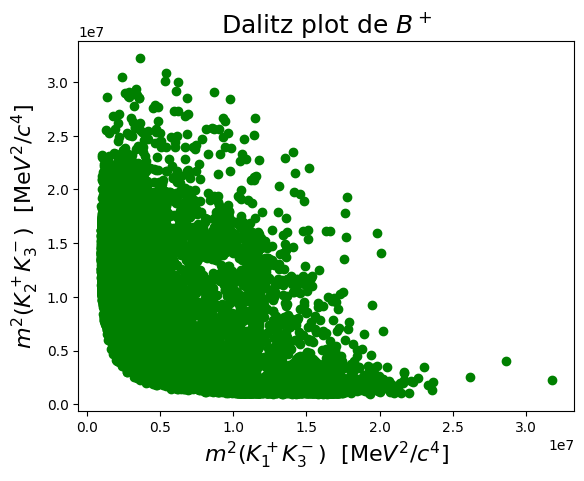

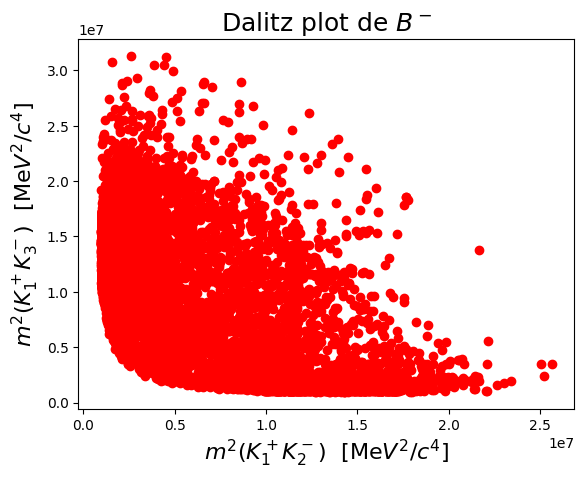

In [35]:
# make a Dalitz plot for the real data (with your preselection cuts applied)

#Dalitz plot para B+
plt.scatter(real_B['R+-'], real_B['R-+'], color="green")
plt.xlabel(r"$m^2(K^+_1K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+_2K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de $B^+$",fontsize=18)
plt.show()

#Daltiz plot para B-
plt.scatter(real_nB['nR+-'], real_nB['nR-+'], color="red")
plt.xlabel(r"$m^2(K^+_1K^-_2)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+_1K^-_3)$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de $B^-$",fontsize=18)
plt.show()

<div align="justify">While drawing the Dalitz plot for the real data, label the axes accordingly. Compare the Dalitz plots of the real data with the one for the simulation.
What are the most striking differences?
</div>

### Ordering Dalitz variables
You can make a further improvement to allow you to observe the resonances easier. Your resonances R<sup>0</sup><sub>2</sub> and R<sup>0</sup><sub>3</sub> are both composed of the same particle types, K<sup>+</sup>K<sup>-</sup>, and hence have the same distributions. It is useful to impose an ordering which distinguishes the resonances. We can call the resonances R<sup>0</sup><sub>Low</sub> and R<sup>0</sup><sub>High</sub>. In each event R<sup>0</sup><sub>Low</sub> is the resonance with the lower mass and the other corresponds to the higher mass combination of kaons. You can now use the mass of these ordered resonances as your Dalitz plot variables, thus effectively "folding" your Dalitz plot so that one axis always has a higher value than the other.


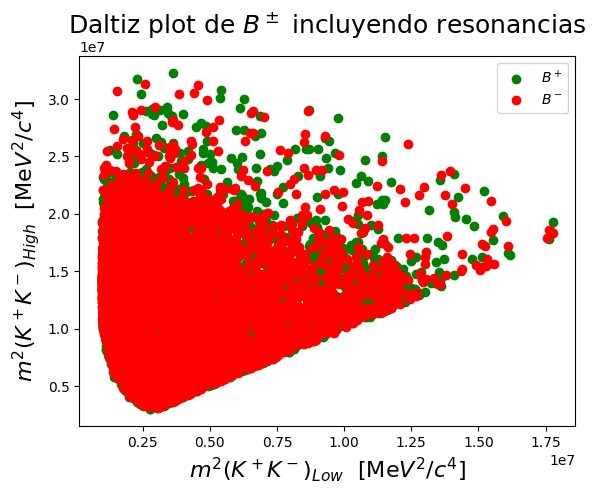

In [36]:
# make a new Dalitz plot with a mass ordering of the axes

#Determinamos los valores min y max de las resonancias de B+
real_B['R0Low'] = real_B[['R+-', 'R-+']].min(axis=1)
real_B['R0High'] = real_B[['R+-', 'R-+']].max(axis=1)

#Determinamos los valores min y max de las resonancias de B-
real_nB['R0Low'] = real_nB[['nR+-', 'nR-+']].min(axis=1)
real_nB['R0High'] = real_nB[['nR+-', 'nR-+']].max(axis=1)



#filtros para quitar resonancias

#Para B+
#Rango de R_Low
aux_filter_real_B = real_B[
    (real_B['R0Low'] < 1800**2) | (real_B['R0Low'] > 1900**2) &
    (real_B['R0Low'] < 3400**2) | (real_B['R0Low'] > 3450**2)].copy()

#Rango de R_high
filter_real_B = aux_filter_real_B[
    (aux_filter_real_B['R0High'] < 3400**2) | (aux_filter_real_B['R0High'] > 3450**2)].copy()

#Para B-
#Rango de R_low (franjas verticales)
aux_filter_real_nB = real_nB[
    (1800**2 > real_nB['R0Low']) | (real_nB['R0Low'] > 1900**2) &  #D0
    (real_nB['R0Low'] < 3400**2) | (real_nB['R0Low'] > 3450**2)].copy()  #Chi

#Rango de R_high
filter_real_nB = aux_filter_real_nB[
    (aux_filter_real_nB['R0High'] < 3400**2) | (aux_filter_real_nB['R0High'] > 3450**2)].copy() #Chi


#Dalitz plot de resonancias de B+/-
plt.scatter(real_B['R0Low'],real_B['R0High'],color="green", label = r"$B^+$")
plt.scatter(real_nB['R0Low'],real_nB['R0High'],color="red", label = r"$B^-$")
plt.xlabel(r"$m^2(K^+K^-)_{Low}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+K^-)_{High}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Daltiz plot de $B^\pm$ incluyendo resonancias",fontsize=18)
plt.legend(fontsize = 10)
plt.show()


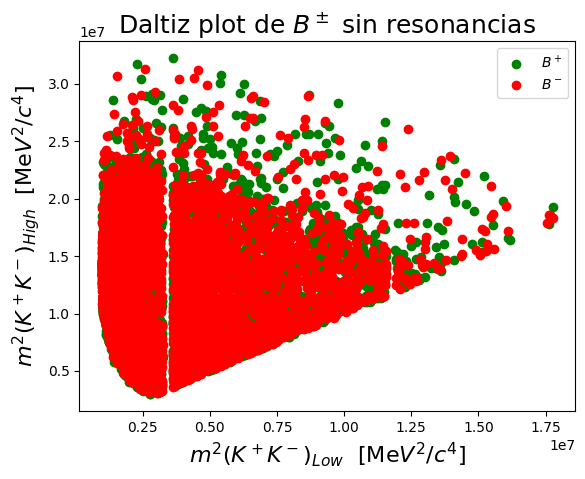

In [37]:
#Dalitz plot quitando las resonancias
plt.scatter(filter_real_B['R0Low'], filter_real_B['R0High'],color="green", label = r"$B^+$")
plt.scatter(filter_real_nB['R0Low'], filter_real_nB['R0High'],color="red", label = r"$B^-$")
plt.xlabel(r"$m^2(K^+K^-)_{Low}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+K^-)_{High}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Daltiz plot de $B^\pm$ sin resonancias",fontsize=18)
plt.legend(fontsize = 10)
plt.show()

### Hint

**Ordered Dalitz plot** - You can find the maximum of the mass of R<sup>0</sup><sub>Low</sub> vs R<sup>0</sup><sub>High</sub> elementwise on one axis, and the minimum of on the other. You can perform elementwise comparisons between two arrays  and return one array filled by either the individual min/max element from the elementwise comparisons.

### Binned Dalitz plot
You can improve the representation of your Dalitz plot by binning the data. The hist2d function can be used to make a 2D histogram. The number of bins specification in the hist2d function is the number of bins in one axis.

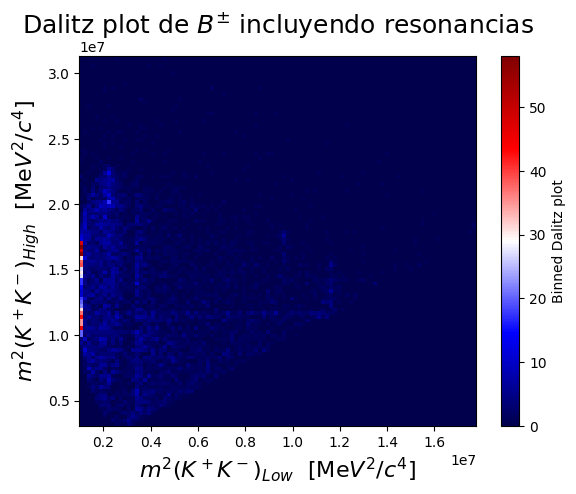

In [38]:
# plot a binned Dalitz Plot
# use colorbar() to make a legend for your plot at the side

#Para B+/-
plt.hist2d(real_B['R0Low'], real_B['R0High'], bins=100, cmap='seismic')
plt.hist2d(real_nB['R0Low'], real_nB['R0High'], bins=100, cmap='seismic')
plt.colorbar(label='Binned Dalitz plot')
plt.xlabel(r"$m^2(K^+K^-)_{Low}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+K^-)_{High}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de $B^{\pm}$ incluyendo resonancias",fontsize=18)
plt.show()

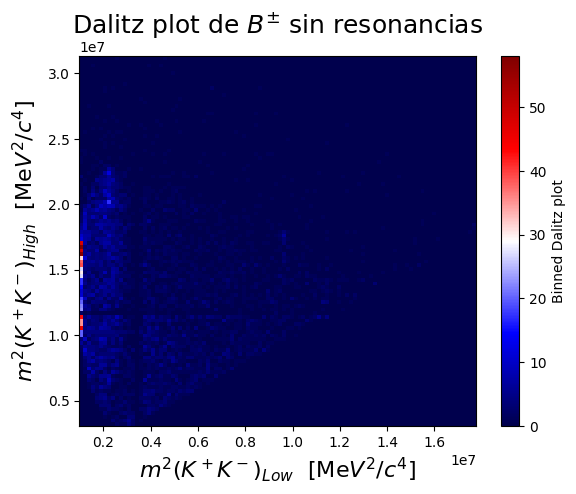

In [39]:
# plot a binned Dalitz Plot with no resonances

#Para B+/- sin resonancia
plt.hist2d(filter_real_B['R0Low'], filter_real_B['R0High'], bins=100, cmap='seismic')
plt.hist2d(filter_real_nB['R0Low'], filter_real_nB['R0High'], bins=100, cmap='seismic')
plt.colorbar(label='Binned Dalitz plot')
plt.xlabel(r"$m^2(K^+K^-)_{Low}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+K^-)_{High}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de $B^{\pm}$ sin resonancias",fontsize=18)
plt.show()

No. de eventos de B+= 5658
No. de eventos de B-= 5220

El valor de la asimetría es = -0.10489
Incertidumbre estadística = 0.00954
El valor del sigma es = -11.00053


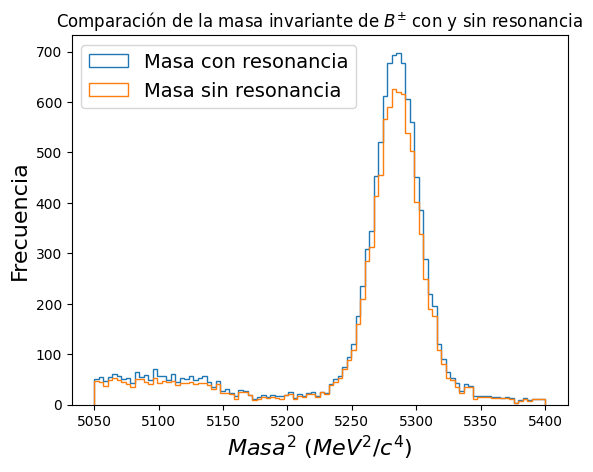

In [40]:
#Asimetria sin resonancias

#Determinamos la cantidad de eventos resultantes sin resonancia que genera B+
filter_B_values = filter_real_B.shape[0]
print('No. de eventos de B+=',filter_B_values)

#Determinamos la cantidad de eventos resultantes sin resonancia que genera B-
filter_nB_values = filter_real_nB.shape[0]
print('No. de eventos de B-=',filter_nB_values)

#Calculamos la asimetría
filter_asymmetry=(filter_nB_values-B_values)/(filter_B_values+filter_nB_values)
print(f"\nEl valor de la asimetría es = {filter_asymmetry:.5f}")

#Calculo de la incertidumbre estadística
filter_significance=np.sqrt((1-filter_asymmetry**2)/(filter_B_values+filter_nB_values))
print(f"Incertidumbre estadística = {filter_significance:.5f}")

#Calculo del sigma
filter_sigma=filter_asymmetry/filter_significance
print(f"El valor del sigma es = {filter_sigma:.5f}")


#Almacenamiento de los datos una vez ya aplicado el filtro
nueva_columna = pandas.concat([filter_real_B['B_M'], filter_real_nB['B_M']], ignore_index=True)

# Agregarla al DataFrame como una nueva columna
df_combinado = pandas.DataFrame({'M_B+-': nueva_columna})

#Realización del histograma
plt.hist(real_df['B_M'], bins=100,range=(5050,5400), histtype='step',label = r"Masa con resonancia")
plt.hist(df_combinado['M_B+-'], bins=100,range=(5050,5400), histtype='step',label=r"Masa sin resonancia")
plt.title(r'Comparación de la masa invariante de $B^{\pm}$ con y sin resonancia')
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('Frecuencia', fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

## Two body resonances

You can now use your Dalitz plot to identify the intermediate resonances that you see in your plots. The resonances will have shown up as bands of higher density of points on the plots. You can use the [particle data group](http://pdg.lbl.gov/2015/tables/contents_tables.html) tables of mesons to identify which particles these correspond to. The tables give the masses and widths of the particles and their decay modes. You are looking for mesons with the masses corresponding to where you see the bands and that decay into K<sup>+</sup>K<sup>-</sup>.

**Congratulations!** You have succesfully made a Dalitz plot and used it to observe the presence of intermediate particles in the decay of your charged B meson into three charged kaons.

# Searching for local matter anti-matter differences
## Aims:
* Observe matter antimatter differences (CP violation) in regions of the Dalitz plots of the B<sup>+</sup> and B<sup>-</sup> mesons.
* For the data in these regions produce plots to best display the CP violation.

In a section above you searched for global CP violation. You probably did not find a result with very high significance.

CP violation may arise from interference between decays through different resonances, and hence the magnitude and sign of the CP violation may vary across the Dalitz plot. We can apply the same equation as in the global CP violation study
<img src="https://drive.google.com/uc?id=1hl0Kt7Eg3hKP-bOL-O-qVJ9dncBDEAq-" width="200" />
but apply this only to events in particular regions of the Dalitz plot.


## Removing charm resonances

The analysis performed here is to study the CP violation in the charmless B meson decays to kaons. "charmless" means that the decay does not proceed through a charm quark. However, the most frequent decay of the B mesons occur through the *b* quark decaying into a *c* quark. The majority of these events can be removed by rejecting the events that are proceeding through a D<sup>0</sup> meson (which contains the charm quark).

In the section above you plotted a histogram of the invariant mass of the intermediate resonances and will have observed the D<sup>0</sup> meson in this and in the Dalitz plot. You should now reject events that are around the mass range of the D<sup>0</sup> meson to suppress this contribution. You can do this in your pre-selection on the data that you set-up earlier in the project.

This was also a simplification that we did not consider when we were calculating the global asymmetry. After you have applied this pre-selection your code will now recompute the global asymmetry with the D<sup>0</sup> meson contribution rejected. We have not yet observed CP violation in charm mesons and searching for this is another active area of current research.

## Comparing Dalitz plots

Make separate Dalitz plots for the B<sup>+</sup> and the B<sup>-</sup> decays.
Local CP Violation will show up as an asymmetry between the B<sup>+</sup> and the B<sup>-</sup> plots.  

In order that the statistical error on the asymmetry in each bin is not over large the bins need to contain a reasonable number of entries. Hence you will probably need larger bins than when you were looking for resonances in the section above. A suitable initial bin size might be $2.5~\text{GeV}^2/\text{c}^4 \times 2.5~\text{GeV}^2/\text{c}^4$.


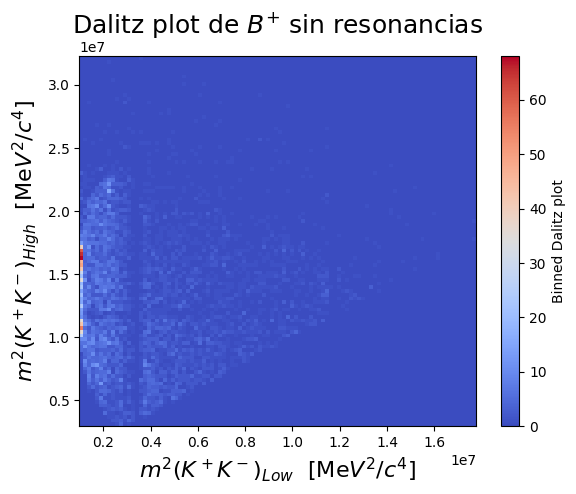

In [41]:
# make a Dalitz plot for the B+ events
plt.hist2d(filter_real_B['R0Low'], filter_real_B['R0High'], bins=100, cmap='coolwarm')
h1, xedges, yedges = np.histogram2d(filter_real_B['R0Low'], filter_real_B['R0High'], bins=10)
plt.colorbar(label='Binned Dalitz plot')
plt.xlabel(r"$m^2(K^+K^-)_{Low}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+K^-)_{High}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de $B^{+}$ sin resonancias",fontsize=18)
plt.show()

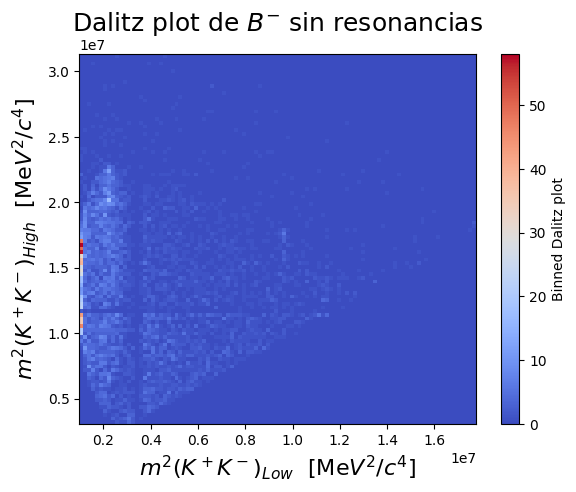

In [42]:
# make a Dalitz plot for the B- events
plt.hist2d(filter_real_nB['R0Low'], filter_real_nB['R0High'], bins=100, cmap='coolwarm')
h2, _, _ = np.histogram2d(filter_real_nB['R0Low'], filter_real_nB['R0High'], bins=10)
plt.colorbar(label='Binned Dalitz plot')
plt.xlabel(r"$m^2(K^+K^-)_{Low}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.ylabel(r"$m^2(K^+K^-)_{High}$  [Me$V^2$/$c^4$]", fontsize = 16)
plt.title(r"Dalitz plot de $B^{-}$ sin resonancias",fontsize=18)
plt.show()


<ipython-input-43-3b1ebd0b41b2>:5: RuntimeWarning: invalid value encountered in divide
  asymmetry = (h2 - h1) / (h2 + h1)


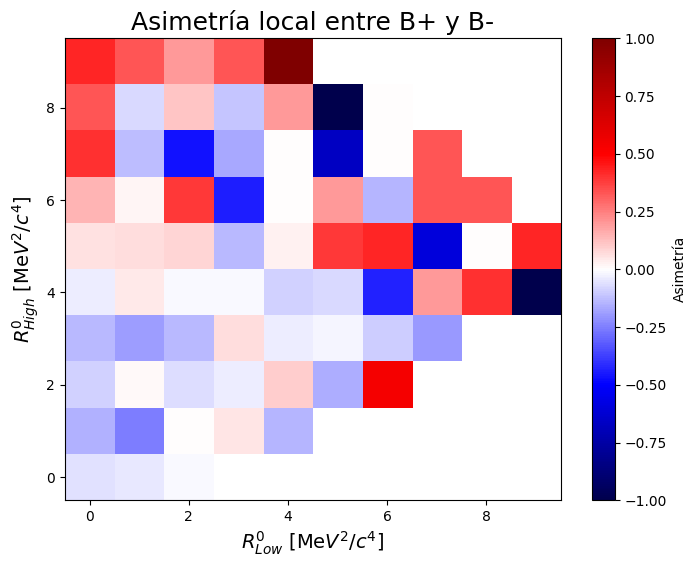

In [43]:
# Make a plot showing the asymmetry between these two Daltz plots
# i.e. calculate the asymmetry between each bin of the B+ and B- Dalitz plots and show the result in another 2D plot

#Calculo de la asimetría entre B+ y B-
asymmetry = (h2 - h1) / (h2 + h1)

# Crear el gráfico 2D de la asimetría
plt.figure(figsize=(8, 6))
plt.imshow(asymmetry.T, origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label='Asimetría')
plt.title('Asimetría local entre B+ y B-', fontsize = 18)
plt.xlabel(r'$R^0_{Low}$ [Me$V^2$/$c^4$]', fontsize = 14)
plt.ylabel(r'$R^0_{High}$ [Me$V^2$/$c^4$]', fontsize = 14)
plt.show()

Observing a large asymmetry in some regions of the plot does not necessarily mean you have observed CP violation. If there are very few events in that region of the plot the uncertainty on that large asymmetry may be large. Hence, the value may still be compatible with zero.

You can calculate the statistical uncertainty on the asymmetry, for each bin of the plot, using the same formulas as you used in the global asymmetry section. You can then make a plot showing the uncertainty on the asymmetry.

Dividing the plot showing the asymmetry by the plot showing the statistical uncertainty you can then obtain the significance of the asymmetry in each bin. You can then plot the significance of the asymmetry to see if there is any evidence for CP violation.

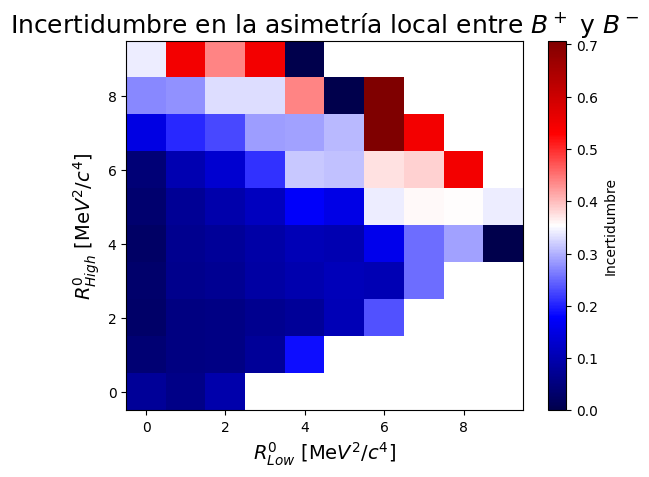

In [44]:
# Make a plot showing the uncertainty on the asymmetry

#Calculo de la incertidumbre
incertidumbre = np.sqrt((1 - asymmetry**2) / (h1 + h2))

#Grafica de la significancia
plt.imshow(incertidumbre.T, origin='lower', cmap='seismic', aspect='auto')

plt.colorbar(label='Incertidumbre')
plt.title(r'Incertidumbre en la asimetría local entre $B^+$ y $B^-$', fontsize = 18)
plt.xlabel(r'$R^0_{Low}$ [Me$V^2$/$c^4$]', fontsize = 14)
plt.ylabel(r'$R^0_{High}$ [Me$V^2$/$c^4$]', fontsize = 14)
plt.show()

<ipython-input-45-3016dc48c3eb>:4: RuntimeWarning: divide by zero encountered in divide
  significancia=asymmetry/incertidumbre


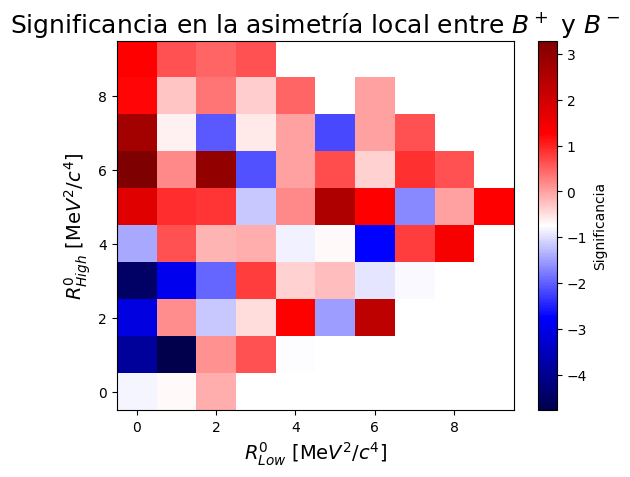

In [45]:
# Make a plot showing the statistical significance of the asymmetry

#Calculo de la significancia
significancia=asymmetry/incertidumbre

#Gráfica de la significancia
plt.imshow(significancia.T, origin='lower', cmap='seismic', aspect='auto')
plt.colorbar(label='Significancia')
plt.title(r'Significancia en la asimetría local entre $B^+$ y $B^-$', fontsize = 18)
plt.xlabel(r'$R^0_{Low}$ [Me$V^2$/$c^4$]', fontsize = 14)
plt.ylabel(r'$R^0_{High}$ [Me$V^2$/$c^4$]', fontsize = 14)
plt.show()

## Observing CP violation

From your studies of the asymmetry plot, and the plot of its significance, you will be able to identify regions in the Dalitz plots that show indications of sizeable and significant CP Violation. You may find you have several consecutive bins with significant positive, or negative, asymmetries. You may wish to try alternative binnings of the Dalitz plots to best isolate the regions in which the significant asymmetries occur.

You can select events that are in these regions of the Dalitz plots where you observe signs of CP Violation. You can then plot a simple 1D histogram of the invariant mass distribution of the B<sup>+</sup> and the B<sup>-</sup> events, just as you did at the start of the project, but only for events that lie in the region of the Dalitz plot that you are interested in. Make the plots of the B<sup>+</sup> and the B<sup>-</sup> events with the same scale, or superimpose the two plots, so that you can observe if the particle and anti-particle decay processes are occurring at the same rate.

<ipython-input-46-3e46f43e404c>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aux_filter2_real_B = filter_real_B[
<ipython-input-46-3e46f43e404c>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter2_real_B = aux_filter2_real_B[


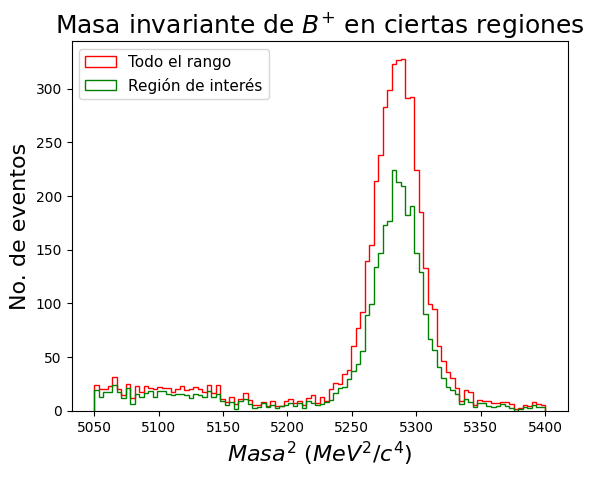

In [46]:
#Para B+
#Rango de R_Low
aux_filter_real_B = real_B[
    (real_B['R0Low'] < 1800**2) | (real_B['R0Low'] > 1900**2) &
    (real_B['R0Low'] < 3400**2) | (real_B['R0Low'] > 3450**2)].copy()

#Rango de R_high
filter_real_B = aux_filter_real_B[
    (aux_filter_real_B['R0High'] < 3400**2) | (aux_filter_real_B['R0High'] > 3450**2)].copy()



# Make a plot showing the invariant mass of the B+ meson particles

aux_filter2_real_B = filter_real_B[
    (aux_filter_real_B['R0High'] < 3800**2) | (aux_filter_real_B['R0High'] > 2000**2)].copy()

filter2_real_B = aux_filter2_real_B[
    (aux_filter_real_B['R0Low'] < 1800**2)].copy()

#Histograma de las masas invariantes para ciertas regiones
plt.hist(filter_real_B['B_M'], bins=100,range=(5050,5400), histtype='step',label=r"Todo el rango", color = "red")
plt.hist(filter2_real_B['B_M'], bins=100,range=(5050,5400), histtype='step',label=r"Región de interés", color = "green")
plt.title(r'Masa invariante de $B^{+}$ en ciertas regiones', fontsize = 18)
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('No. de eventos', fontsize = 16)
plt.legend(fontsize = 11)
plt.show()


<ipython-input-47-0983c533d42c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aux_filter2_real_nB = filter_real_nB[
<ipython-input-47-0983c533d42c>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter2_real_nB = aux_filter2_real_nB[


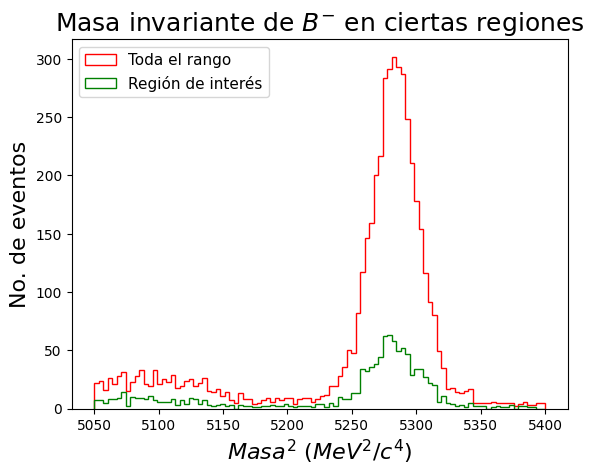

In [47]:
# Make a  showing the invariant mass of the B- meson particles using events from the same region

#Aplicando el filtro para solo ciertas regiones
aux_filter2_real_nB = filter_real_nB[
    (aux_filter_real_nB['R0High'] < 3400**2) | (aux_filter_real_B['R0High'] > 2000**2)].copy()

filter2_real_nB = aux_filter2_real_nB[
    (aux_filter_real_nB['R0Low'] < 1800**2)].copy()

#Histograma de masa invariante para ciertas regiones
plt.hist(filter_real_nB['B_M'], bins=100,range=(5050,5400), histtype='step',label=r"Toda el rango", color = "red")
plt.hist(filter2_real_nB['B_M'], bins=100,range=(5050,5400), histtype='step',label=r"Región de interés", color = "green")
plt.title(r'Masa invariante de $B^{-}$ en ciertas regiones', fontsize = 18)
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('No. de eventos', fontsize = 16)
plt.legend(fontsize = 11)
plt.show()

In [48]:
#Asimetria local

#Cálculo de eventos de B+
filter2_B_values = filter2_real_B.shape[0]
print('No. de eventos de B+ = ',filter2_B_values)

#Calculo de eventos de B-
filter2_nB_values = filter2_real_nB.shape[0]
print('No. de eventos de B- =',filter2_nB_values)

#Cálculo de la asimetría
filter2_asymmetry=(filter2_nB_values-filter2_B_values)/(filter2_B_values+filter2_nB_values)
print('\nValor de la asimetría = ',filter2_asymmetry)

#Calculo de la incertidumbre estadística
filter2_significance=np.sqrt((1-filter2_asymmetry**2)/(filter2_B_values+filter2_nB_values))
print('Valor de la incertidumbre',filter2_significance)

#Cálculo de la significancia
filter2_sigma=filter2_asymmetry/filter2_significance
print('Un sigma = ',filter2_sigma)

No. de eventos de B+ =  3560
No. de eventos de B- = 1081

Valor de la asimetría =  -0.5341521223874165
Valor de la incertidumbre 0.01240939157999685
Un sigma =  -43.044183024124706


**Congratulations!** You should now have succesfully observed significant evidence for CP Violation. You should have plots that clearly show that particle and anti-particle decay processes occur at different rates in local regions of the Dalitz plot. You may wish to comapre your results with those published by the LHCb collaboration in this [paper](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html).

**Well Done** you have succesfully completed your first particle physics analysis project. There are many more analyses that can be conducted witht the data set that you have been provided and the skills that you have gained. Ideas for some of these are explored in the section below. Maybe you can discover something new!

## Adding extra sophistication

### Fitting the mass
So far you used only the number of total events to calculate the asymmetry. However, your invariant mass histogram is a combination of signal sitting on top of background. To extract the correct number of signal candidates you have to use a function to fit your signal and background.

### Hint - Challenges 3 and 4
Some typical functions for the signal are the Gaussian or the Crystal ball funtions. For the background, the exponential function or a polynomial are commonly used.

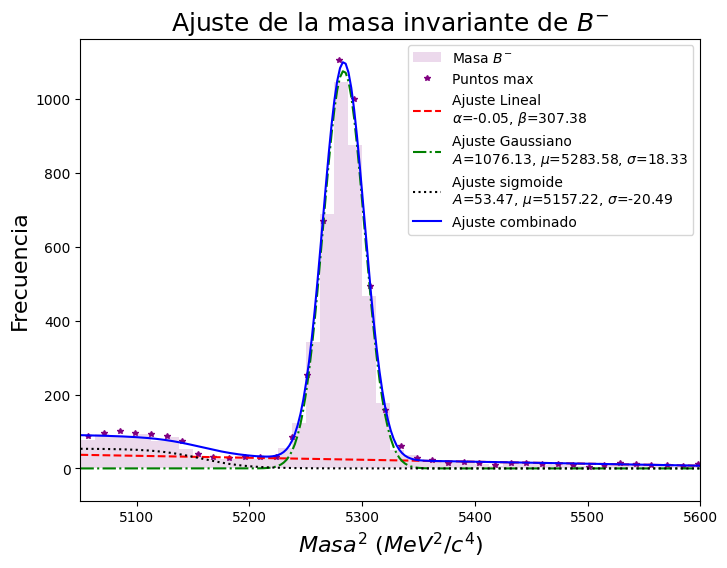

In [49]:
# Plot and fit the invariant mass of the B-meson

#Definición del ajuste lineal
def linear_fit(x, a, b):
    return a * x + b

#Definición del ajuste exponencial
def exp_decreasing_fit(x, A, k, C):
    return A * np.exp(-k * x) + C

#Definición del ajuste gaussiano
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

#Definición del ajuste sigmoidal
def sigmoid(x, A, mu2, gamma):
    return A / (1 + np.exp(-(x - mu2) / gamma))


#Extraemos la masa invariante sin resonancias en toda la región de B-
hist, bin_edges = np.histogram(filter_real_nB['B_M'], bins=90)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(filter_real_nB['B_M'], bins=100, alpha=0.15, color='purple', label=r'Masa $B^{-}$')
plt.plot(bin_centers, hist, '*', label='Puntos max', color='purple', markersize=4)

#Ajuste lineal
filtered_data = filter_real_nB['B_M'][ (filter_real_nB['B_M'] > 5150)  & (filter_real_nB['B_M'] <= 5250) | ((filter_real_nB['B_M'] > 5300) & (filter_real_nB['B_M'] < 5800))].copy()
filtered_hist, filtered_bin_edges = np.histogram(filtered_data, bins=100)
filtered_bin_centers = (filtered_bin_edges[:-1] + filtered_bin_edges[1:]) / 2
params, covariance = curve_fit(linear_fit, filtered_bin_centers, filtered_hist, p0=[0, 40])
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_linear = linear_fit(x_fit, *params)
#grafica lineal
plt.plot(x_fit, linear_fit(x_fit, *params), label=f'Ajuste Lineal\n$\\alpha$={params[0]:.2f}, $\\beta$={params[1]:.2f}', color='red', linestyle='--')


#Ajuste gaussiano
filtered2_data = filter_real_nB['B_M'].copy()
filtered2_hist, filtered2_bin_edges = np.histogram(filtered2_data, bins=95)
filtered2_bin_centers = (filtered2_bin_edges[:-1] + filtered2_bin_edges[1:]) / 2
params2, covariance2 = curve_fit(gaussian, filtered2_bin_centers, filtered2_hist, p0=[100, 5300, 3])
A, mu, sigma = params2
x2_fit = np.linspace(filtered2_bin_edges[0], filtered2_bin_edges[-1], 500)
y_fit_gaussian = gaussian(x2_fit, *params2)
#grafica gaussiana
plt.plot(x2_fit, gaussian(x2_fit, *params2), label=f'Ajuste Gaussiano\n$A$={A:.2f}, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}', color='green', linestyle='-.')


#Ajuste sigmoidal
filtered3_data = filter_real_nB['B_M'][(filter_real_nB['B_M'] < 5200) ].copy()
filtered3_hist, filtered3_bin_edges = np.histogram(filtered3_data, bins=20)
filtered3_bin_centers = (filtered3_bin_edges[:-1] + filtered3_bin_edges[1:]) / 2
params3, covariance2 = curve_fit(sigmoid, filtered3_bin_centers, filtered3_hist, p0=[5000, 5100, 5000])
A, mu2, gamma = params3
x3_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_sigmoid = sigmoid(x3_fit, *params3)
#grafica sigmoide
plt.plot(x3_fit, sigmoid(x3_fit, *params3), label=f'Ajuste sigmoide\n$A$={A:.2f}, $\mu$={mu2:.2f}, $\sigma$={gamma:.2f}', color='black', linestyle=':')


#Contribución de los 3 fits
total_curve = y_fit_linear + y_fit_gaussian + y_fit_sigmoid
plt.plot(x_fit, total_curve, label="Ajuste combinado", color='blue')


#ejes
plt.xlim(5050, 5600)
plt.title(r'Ajuste de la masa invariante de $B^{-}$', fontsize = 18)
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('Frecuencia', fontsize = 16)
plt.legend()
plt.show()


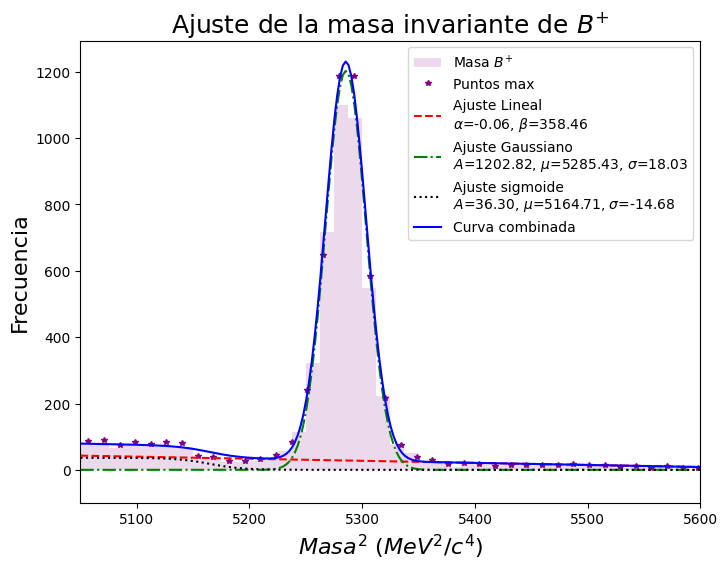

In [50]:
#Extraemos la masa invariante sin resonancias en toda la región de B+
plt.figure(figsize=(8, 6))
hist, bin_edges = np.histogram(filter_real_B['B_M'], bins=90)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar el histograma
plt.hist(filter_real_B['B_M'], bins=100, alpha=0.15, color='purple', label=r'Masa $B^{+}$')
plt.plot(bin_centers, hist, '*', label='Puntos max', color='purple', markersize=4)

#Ajuste lineal
filtered_data = filter_real_B['B_M'][ (filter_real_B['B_M'] > 5150)  & (filter_real_B['B_M'] <= 5250) | ((filter_real_B['B_M'] > 5300) & (filter_real_B['B_M'] < 5800))].copy()
filtered_hist, filtered_bin_edges = np.histogram(filtered_data, bins=100)
filtered_bin_centers = (filtered_bin_edges[:-1] + filtered_bin_edges[1:]) / 2
params, covariance = curve_fit(linear_fit, filtered_bin_centers, filtered_hist, p0=[0, 40])
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_linear = linear_fit(x_fit, *params)
#grafica lineal
plt.plot(x_fit, linear_fit(x_fit, *params), label=f'Ajuste Lineal\n$\\alpha$={params[0]:.2f}, $\\beta$={params[1]:.2f}', color='red', linestyle='--')


#Ajuste gaussino
filtered2_data = filter_real_B['B_M'].copy()
filtered2_hist, filtered2_bin_edges = np.histogram(filtered2_data, bins=95)
filtered2_bin_centers = (filtered2_bin_edges[:-1] + filtered2_bin_edges[1:]) / 2
params2B, covariance2B = curve_fit(gaussian, filtered2_bin_centers, filtered2_hist, p0=[100, 5300, 3])
A, mu, sigma = params2B
x2_fit = np.linspace(filtered2_bin_edges[0], filtered2_bin_edges[-1], 500)
y_fit_gaussian = gaussian(x2_fit, *params2B)
#grafica gaussiana
plt.plot(x2_fit, gaussian(x2_fit, *params2B), label=f'Ajuste Gaussiano\n$A$={A:.2f}, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}', color='green', linestyle='-.')


#Ajuste sigmoidal
filtered3_data = filter_real_B['B_M'][(filter_real_B['B_M'] < 5170) ].copy()
filtered3_hist, filtered3_bin_edges = np.histogram(filtered3_data, bins=20)
filtered3_bin_centers = (filtered3_bin_edges[:-1] + filtered3_bin_edges[1:]) / 2
params3, covariance2 = curve_fit(sigmoid, filtered3_bin_centers, filtered3_hist, p0=[5000, 5000, 5000], maxfev=10000)
A, mu2, gamma = params3
x3_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_sigmoid = sigmoid(x3_fit, *params3)
#grafica sigmoide
plt.plot(x3_fit, sigmoid(x3_fit, *params3), label=f'Ajuste sigmoide\n$A$={A:.2f}, $\mu$={mu2:.2f}, $\sigma$={gamma:.2f}', color='black', linestyle=':')


#Contribución de los 3 fits
total_curve = y_fit_linear + y_fit_gaussian + y_fit_sigmoid
plt.plot(x_fit, total_curve, label="Curva combinada", color='blue')


#ejes
plt.xlim(5050, 5600)
plt.title(r'Ajuste de la masa invariante de $B^{+}$', fontsize = 18)
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('Frecuencia', fontsize = 16)
plt.legend()
plt.show()

In [51]:
# Calculate the CP asymmetry using the values extracted from the fit

#Area del histograma
area_minus = params2[0] * np.sqrt(2 * np.pi) * params2[2]
area_plus = params2B[0] * np.sqrt(2 * np.pi) * params2B[2]

#Cálculo de la asimetría
A_CP=(area_minus - area_plus) / (area_minus + area_plus)

#Calculamos la incertidumbre apartir de los valores del fit
error_A_plus = np.sqrt(covariance2B[0, 0])
error_mu_plus = np.sqrt(covariance2B[1, 1])
error_sigma_plus = np.sqrt(covariance2B[2, 2])

error_A_minus = np.sqrt(covariance2[0, 0])
error_mu_minus = np.sqrt(covariance2[1, 1])
error_sigma_minus = np.sqrt(covariance2[2, 2])

delta = area_minus - area_plus
sigma = area_minus + area_plus

error_area_minus = np.sqrt((np.sqrt(2 * np.pi) * params2[2] * error_A_minus)**2 +
                           (params2[0] * np.sqrt(2 * np.pi) * error_sigma_minus/params2[2])**2)

error_area_plus = np.sqrt((np.sqrt(2 * np.pi) * params2B[2] * error_A_plus)**2 +
                          (params2B[0] * np.sqrt(2 * np.pi) * error_sigma_plus /params2B[2] )**2)

#Incertidumbre estadística
sigma_A_CP = (2 / sigma**2) * np.sqrt((area_plus**2 * error_area_minus**2) +
                                      (area_minus**2 * error_area_plus**2))

# Calcular significancia estadística
significance = abs(A_CP) / sigma_A_CP

#Impresión de los resultados
print(f"Asimetría de violación de CP (A_CP): {A_CP:.4f} ± {sigma_A_CP:.4f}")
print(f"Significancia estadística: {significance:.2f} sigma")
print(f"\nÁrea B-: {area_minus:.4f} ± {error_area_minus:.4f}")
print(f"Área B+: {area_plus:.4f} ± {error_area_plus:.4f}")

Asimetría de violación de CP (A_CP): -0.0474 ± 0.0146
Significancia estadística: 3.24 sigma

Área B-: 49438.7411 ± 1143.4895
Área B+: 54353.4377 ± 975.3559


### Systematic Uncertainties - Challenge 4
In this analysis you considered the statistical uncertainty on the result. This occurs as a result of having only a limited number of events. In addition there are [systematic uncertainties](https://en.wikipedia.org/wiki/Observational_error#Systematic_versus_random_error), these arise from biases in your measurement.

In this section you will compute the systematic uncertainties of using diferent models/functions to fit your signal and background. Try using a different function for your signal (e.g. instead of a Gaussian use a Crystal Ball) and compute the asymmetry when using this other function. Do the same for the background function.

The systematic uncertainty will be the difference between the two values of the asymmetry.

<ipython-input-52-28ab491ae9c0>:13: RuntimeWarning: overflow encountered in power
  power_law = (B - (x - mu) / sigma) ** (-n)
<ipython-input-52-28ab491ae9c0>:13: RuntimeWarning: invalid value encountered in power
  power_law = (B - (x - mu) / sigma) ** (-n)
<ipython-input-52-28ab491ae9c0>:42: OptimizeWarning: Covariance of the parameters could not be estimated
  params2, covariance2 = curve_fit(crystal_ball, filtered2_bin_centers, filtered2_hist, p0=[1.5, 5, 5300, 100, 100, 10], maxfev=10000)


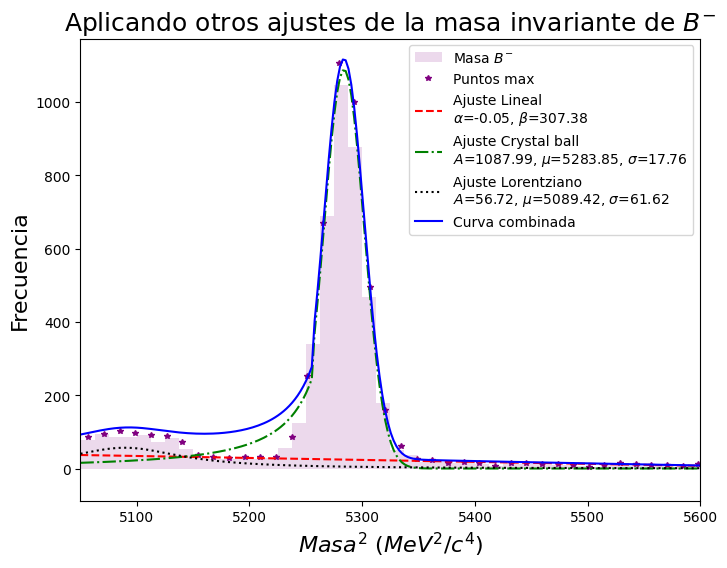

In [52]:
# Plot and fit the invariant mass of the B-meson using another fit function

#Ajuste de la función lorentziana
def lorentzian(x, A, mu, gamma):
    return A / (1 + ((x - mu) / gamma)**2)

#Ajuste de la función crystal ball
def crystal_ball(x, alpha, n, mu, sigma, A, B):
    # Parte Gaussiana
    gauss = np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    # Parte de la cola
    power_law = (B - (x - mu) / sigma) ** (-n)

    # Aplicar la condición para elegir entre la Gaussiana y la cola
    return np.where((x - mu) / sigma > -alpha, A * gauss, A * power_law)

#Extraemos la masa invariante sin resonancias en toda la región de B-
hist, bin_edges = np.histogram(filter_real_nB['B_M'], bins=90)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(filter_real_nB['B_M'], bins=100, alpha=0.15, color='purple', label=r'Masa $B^{-}$')
plt.plot(bin_centers, hist, '*', label='Puntos max', color='purple', markersize=4)

#Ajuste lineal
filtered_data = filter_real_nB['B_M'][ (filter_real_nB['B_M'] > 5150)  & (filter_real_nB['B_M'] <= 5250) | ((filter_real_nB['B_M'] > 5300) & (filter_real_nB['B_M'] < 5800))].copy()
filtered_hist, filtered_bin_edges = np.histogram(filtered_data, bins=100)
filtered_bin_centers = (filtered_bin_edges[:-1] + filtered_bin_edges[1:]) / 2
params, covariance = curve_fit(linear_fit, filtered_bin_centers, filtered_hist, p0=[0, 40])
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_linear = linear_fit(x_fit, *params)
#grafica lineal
plt.plot(x_fit, linear_fit(x_fit, *params), label=f'Ajuste Lineal\n$\\alpha$={params[0]:.2f}, $\\beta$={params[1]:.2f}', color='red', linestyle='--')


#Ajuste por la función crystal_ball
filtered2_data = filter_real_nB['B_M'].copy()
filtered2_hist, filtered2_bin_edges = np.histogram(filtered2_data, bins=95)
filtered2_bin_centers = (filtered2_bin_edges[:-1] + filtered2_bin_edges[1:]) / 2
params2, covariance2 = curve_fit(crystal_ball, filtered2_bin_centers, filtered2_hist, p0=[1.5, 5, 5300, 100, 100, 10], maxfev=10000)
alpha, n, mu, sigma, A, B = params2
x2_fit = np.linspace(filtered2_bin_edges[0], filtered2_bin_edges[-1], 500)
y_fit_gaussian =crystal_ball(x2_fit, *params2)
#grafica crystal_ball
plt.plot(x2_fit, crystal_ball(x2_fit, *params2), label=f'Ajuste Crystal ball\n$A$={A:.2f}, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}', color='green', linestyle='-.')


#Ajuste por la función lorentiana
filtered3_data = filter_real_nB['B_M'][(filter_real_nB['B_M'] < 5200) ].copy()
filtered3_hist, filtered3_bin_edges = np.histogram(filtered3_data, bins=20)
filtered3_bin_centers = (filtered3_bin_edges[:-1] + filtered3_bin_edges[1:]) / 2
params3, covariance2 = curve_fit(lorentzian, filtered3_bin_centers, filtered3_hist, p0=[5000, 5100, 5000])
A, mu2, gamma = params3
x3_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_lorentzian = lorentzian(x3_fit, *params3)
#grafica lorentziana
plt.plot(x3_fit, lorentzian(x3_fit, *params3), label=f'Ajuste Lorentziano\n$A$={A:.2f}, $\mu$={mu2:.2f}, $\sigma$={gamma:.2f}', color='black', linestyle=':')


#Contribución de los 3 fits
total_curve = y_fit_linear + y_fit_gaussian + y_fit_lorentzian
plt.plot(x_fit, total_curve, label="Curva combinada", color='blue')

plt.xlim(5050, 5600)
plt.title(r'Aplicando otros ajustes de la masa invariante de $B^{-}$', fontsize = 18)
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('Frecuencia', fontsize = 16)
plt.legend()
plt.show()

<ipython-input-52-28ab491ae9c0>:13: RuntimeWarning: overflow encountered in power
  power_law = (B - (x - mu) / sigma) ** (-n)
<ipython-input-52-28ab491ae9c0>:13: RuntimeWarning: invalid value encountered in power
  power_law = (B - (x - mu) / sigma) ** (-n)
<ipython-input-53-c92ddeb7de71>:25: OptimizeWarning: Covariance of the parameters could not be estimated
  params2B, covariance2 = curve_fit(crystal_ball, filtered2_bin_centers, filtered2_hist, p0=[1.5, 5, 5300, 100, 100, 10], maxfev=10000)


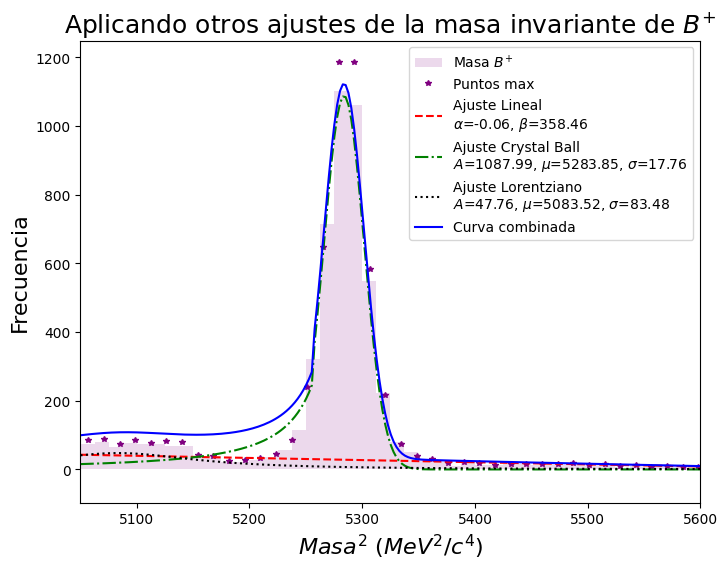

In [53]:
#Extraemos la masa invariante sin resonancias en toda la región de B+
hist, bin_edges = np.histogram(filter_real_B['B_M'], bins=90)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(filter_real_B['B_M'], bins=100, alpha=0.15, color='purple', label=r'Masa $B^{+}$')
plt.plot(bin_centers, hist, '*', label='Puntos max', color='purple', markersize=4)

#Ajuste lineal
filtered_data = filter_real_B['B_M'][ (filter_real_B['B_M'] > 5150)  & (filter_real_B['B_M'] <= 5250) | ((filter_real_B['B_M'] > 5300) & (filter_real_B['B_M'] < 5800))].copy()
filtered_hist, filtered_bin_edges = np.histogram(filtered_data, bins=100)
filtered_bin_centers = (filtered_bin_edges[:-1] + filtered_bin_edges[1:]) / 2
params, covariance = curve_fit(linear_fit, filtered_bin_centers, filtered_hist, p0=[0, 40])
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_linear = linear_fit(x_fit, *params)
#grafica lineal
plt.plot(x_fit, linear_fit(x_fit, *params), label=f'Ajuste Lineal\n$\\alpha$={params[0]:.2f}, $\\beta$={params[1]:.2f}', color='red', linestyle='--')


#Ajuste de la función crystal_ball
filtered2_data = filter_real_B['B_M'].copy()
filtered2_hist, filtered2_bin_edges = np.histogram(filtered2_data, bins=95)
filtered2_bin_centers = (filtered2_bin_edges[:-1] + filtered2_bin_edges[1:]) / 2
params2B, covariance2 = curve_fit(crystal_ball, filtered2_bin_centers, filtered2_hist, p0=[1.5, 5, 5300, 100, 100, 10], maxfev=10000)
alpha, n, mu, sigma, A, B = params2
x2_fit = np.linspace(filtered2_bin_edges[0], filtered2_bin_edges[-1], 500)
y_fit_gaussian =crystal_ball(x2_fit, *params2)
#grafica crystal_ball
plt.plot(x2_fit, crystal_ball(x2_fit, *params2), label=f'Ajuste Crystal Ball\n$A$={A:.2f}, $\mu$={mu:.2f}, $\sigma$={sigma:.2f}', color='green', linestyle='-.')


#Ajuste de la función lorentziana
filtered3_data = filter_real_B['B_M'][(filter_real_B['B_M'] < 5200) ].copy()
filtered3_hist, filtered3_bin_edges = np.histogram(filtered3_data, bins=20)
filtered3_bin_centers = (filtered3_bin_edges[:-1] + filtered3_bin_edges[1:]) / 2
params3, covariance2 = curve_fit(lorentzian, filtered3_bin_centers, filtered3_hist, p0=[5000, 5100, 5000])
A, mu2, gamma = params3
x3_fit = np.linspace(bin_edges[0], bin_edges[-1], 500)
y_fit_lorentzian = lorentzian(x3_fit, *params3)
#grafica lorentziana
plt.plot(x3_fit, lorentzian(x3_fit, *params3), label=f'Ajuste Lorentziano\n$A$={A:.2f}, $\mu$={mu2:.2f}, $\sigma$={gamma:.2f}', color='black', linestyle=':')


#Contribución de los 3 fits
total_curve = y_fit_linear + y_fit_gaussian + y_fit_lorentzian
plt.plot(x_fit, total_curve, label="Curva combinada", color='blue')

plt.xlim(5050, 5600)
plt.title(r'Aplicando otros ajustes de la masa invariante de $B^{+}$', fontsize = 18)
plt.xlabel(r"$Masa^2$ ($MeV^2$/$c^4$)", fontsize = 16)
plt.ylabel('Frecuencia', fontsize = 16)
plt.legend()
plt.show()

In [54]:
# Calculate the CP asymmetry using the values extracted from the fit
area_minus = params2[4] * np.sqrt(2 * np.pi) * params2[3]
area_plus = params2B[4] * np.sqrt(2 * np.pi) * params2B[3]

#Calculo de la asimetría
A_CP2=(area_minus - area_plus) / (area_minus + area_plus)
print(f"Asimetría de violación de CP (A_CP): {A_CP2}")

Asimetría de violación de CP (A_CP): -0.0504369030401162


In [55]:
# Compute the systematic uncertainty
systematic_uncertainty = A_CP2-A_CP
print(f"La incerteza sistemática = {systematic_uncertainty:.5f}")

La incerteza sistemática = -0.00309


# Further analyses

The data set you have been provided is the full set of data recorded by LHCb preselected for decays of charged B mesons into three final state tracks. This data set has been used for two important publications, [here](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-027.html) and [here](http://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html).

We discuss here:
<ul>
<li>Additional elements that you could add to your analysis of B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> </li>
<li>Further analyses that you could perform with this data set</li>
</ul>

### More Systematic Uncertainties
In this analysis you considered the statistical uncertainty on the result. This occurs as a result of having only a limited number of events. In addition there are [systematic uncertainties](https://en.wikipedia.org/wiki/Observational_error#Systematic_versus_random_error), these arise from biases in your measurement. Here we discuss three sources of these for this analysis.
<ul>
<li> Production asymmetry. The LHC is a proton-proton collider and hence the initial state of the collision is not matter antimatter symmetric. Consequently B<sup>+</sup> and B<sup>-</sup> mesons may not be produced at exactly the same rates. This small production asymmetry it is estimated could be approximately 1%. It can also be measured from the data, as discussed in the LHCb paper.</li>
<li> Detection asymmetry. The LHCb detector could be more efficient for detecting either the B<sup>+</sup> or the B<sup>-</sup> final states. This is because the positive and negative kaons will be bent by the magnet indifferent directions in the detector. If the efficiency of the detector is higher in one region than another this will lead to higher efficiencies for K<sup>+</sup> or K<sup>-</sup> and hence for B<sup>+</sup> or B<sup>-</sup>. For this reason the magnetic field of the LHCb detector is regularly reversed. You used data in this analysis in which the magnetic field was both up and down and hence the effect will (partially) cancel. By comparing results for the two magnet polarities separately you can check the size of this effect. When loading the data above both polarities were combined, you can instead load them independently to measure the difference between the two datasets.</li>
<li> Analysis technique. The analysis technique you have used may bias the result. A major simplification we made in the analysis above was to neglect 'background' events. We imposed a selection to select a sample of predominantly signal events but have not accounted for the effect of the residual background events.</li>
</ul>

### Using mass sidebands

One source of 'background' events arises from random combinations of tracks in events that happen to fake the 'signal' characteristics. These events will not peak in the mass distribution at the mass of the B meson but rtaher will have a smoothly varying distribution. Looking at the number and distribution of of events away from the mass peak can allow you to estimate the number of background events under the mass peak.

## Further analyses

The LHCb papers using this data set that you are using analysed four decay channels of the charged B mesons. You can perform any of these analyses.
<ul>
<li>B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> (and anti-particle equivalent). This is the analysis you have performed here. It has the lowest background of the four channels and hence the approximation we made of neglecting the background events will give the least bias to this channel.</li>
<li>B<sup>+</sup> → &pi;<sup>+</sup>&pi;<sup>+</sup>&pi;<sup>−</sup> (and anti-particle equivalent). In this analysis the final state is three charged pions. The level of background events compared to the signal is significantly higher as pions are the most commonly produced particle at the LHC. Hence, a method of estimating the background level should be added to complete this analysis.</li>
<li>B<sup>+</sup> → K<sup>+</sup>&pi;<sup>+</sup>&pi;<sup>−</sup> (and anti-particle equivalent). In this analysis the final state is a mixture of one kaon and two pions. This means that the analysis needs to determine in each event which track is the best candidate kaon and apply selection cuts appropriately to select out the events.</li>
<li>B<sup>+</sup> → &pi;<sup>+</sup>K<sup>+</sup>K<sup>−</sup> (and anti-particle equivalent). This channel has a higher level of background compared to the signal.</li>
</ul>